<a href="https://colab.research.google.com/github/BelongsToMe091603/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Dicoding-MachineLearning/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Dicoding-MachineLearning/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Menampilkan ringkasan informasi dari dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Menampilkan statistik deskriptif dari dataset
train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_value = train.isnull().sum()
missing_value[missing_value > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


## Mengatasi Missing Value

In [ ]:
# pisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
less = missing_value[missing_value < 1000].index
over = missing_value[missing_value >= 1000].index # ika salah satu fitur memiliki missing value lebih dari 1000, dapat kita asumsikan terlalu banyak data yang hilang
over

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
# contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = train[less].select_dtypes(include=["number"]).columns # nama-nama kolom dari DataFrame train yang memiliki tipe data numerik dari subset kolom yang ditentukan oleh less
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median()) # mengisi semua nilai yang hilang (NaN) pada kolom-kolom numerik tersebut dengan nilai median dari masing-masing kolom
train[numeric_features]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori
categorical_features = train[less].select_dtypes(include=["object"]).columns # nama-nama kolom dari DataFrame train yang memiliki tipe data kategori dari subset kolom yang ditentukan oleh less

# setiap kolom kategori akan melakukan proses pergantian untuk semua nilai yang hilang (NaN) dengan nilai modus dari kolom tersebut
for column in categorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])

In [ ]:
# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = train.drop(columns=over)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
missing_value = df.isnull().sum()
missing_value[missing_value > 0]

,0


## Mengatasi Outliers

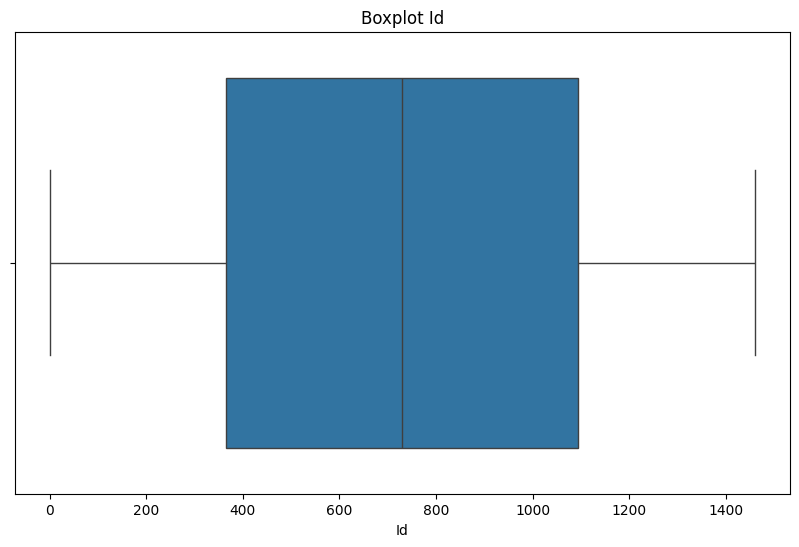

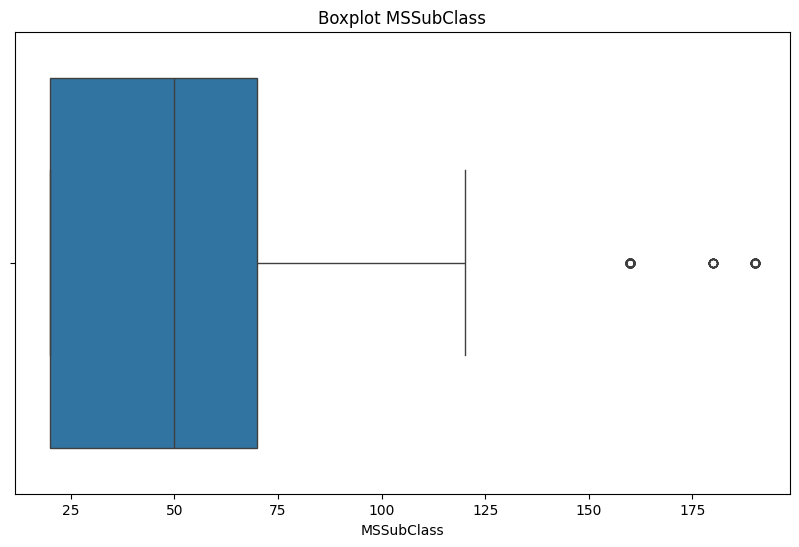

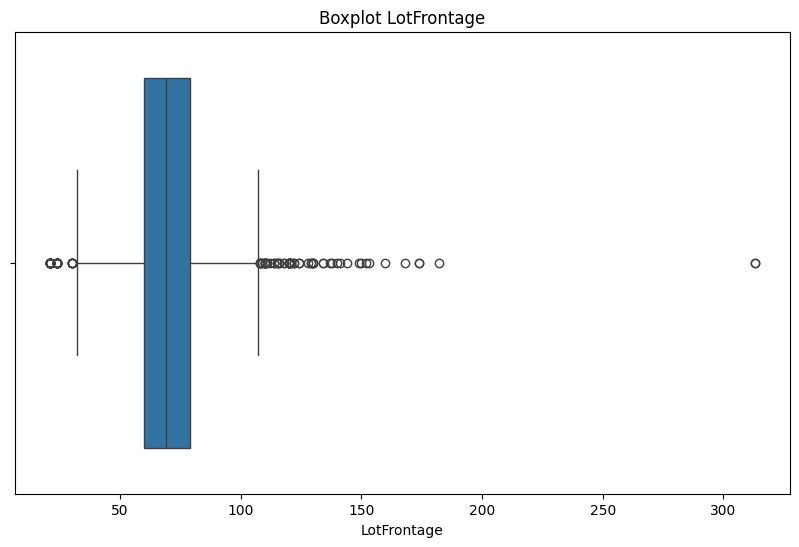

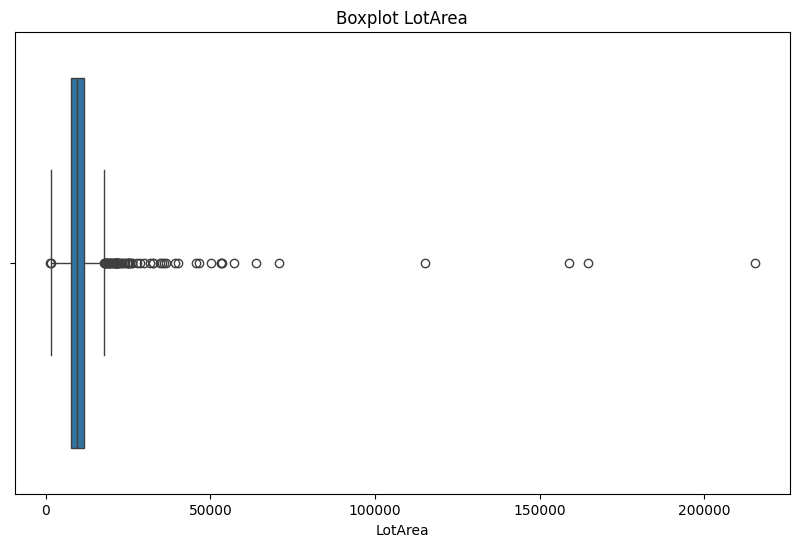

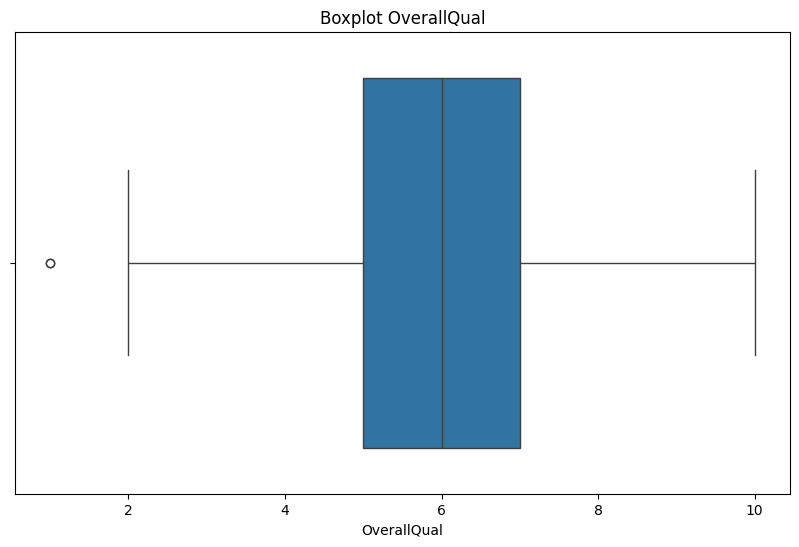

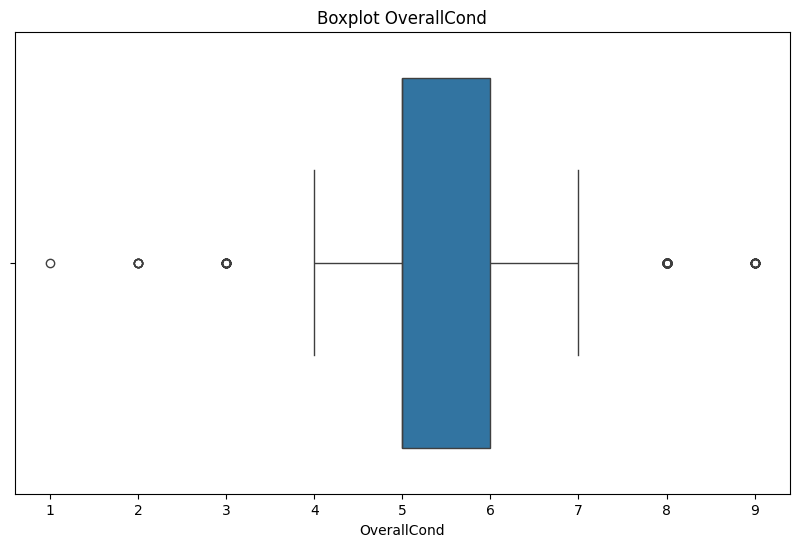

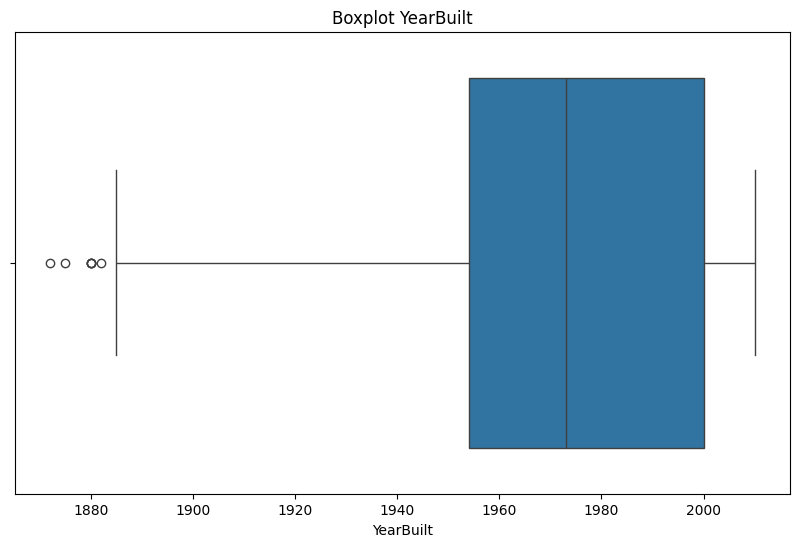

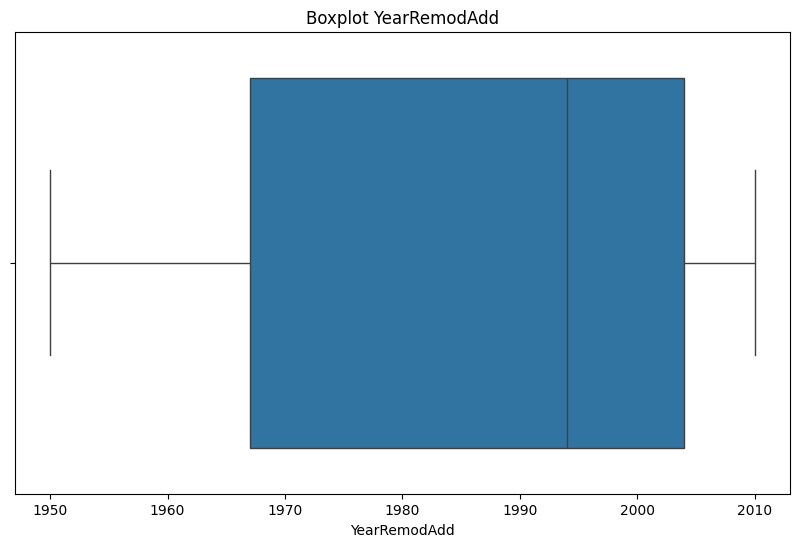

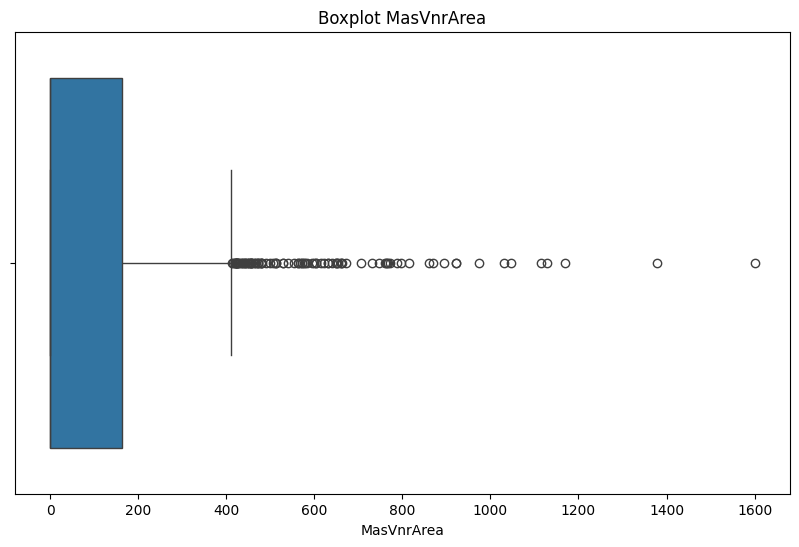

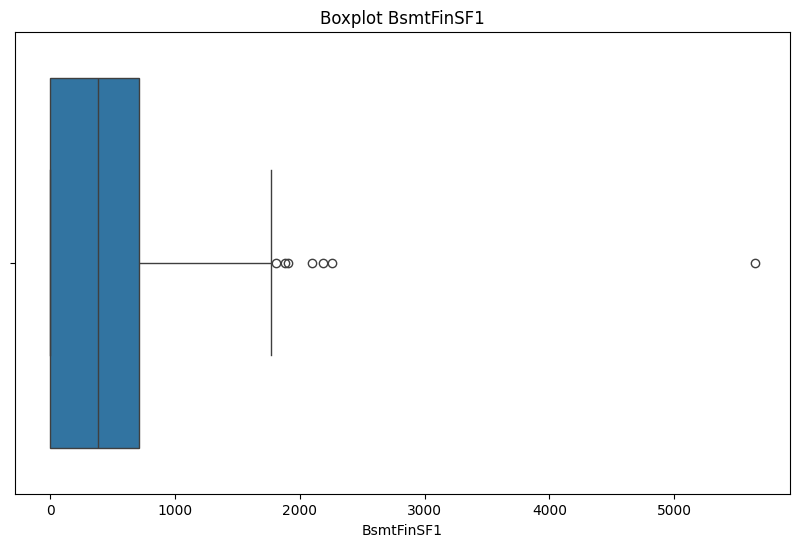

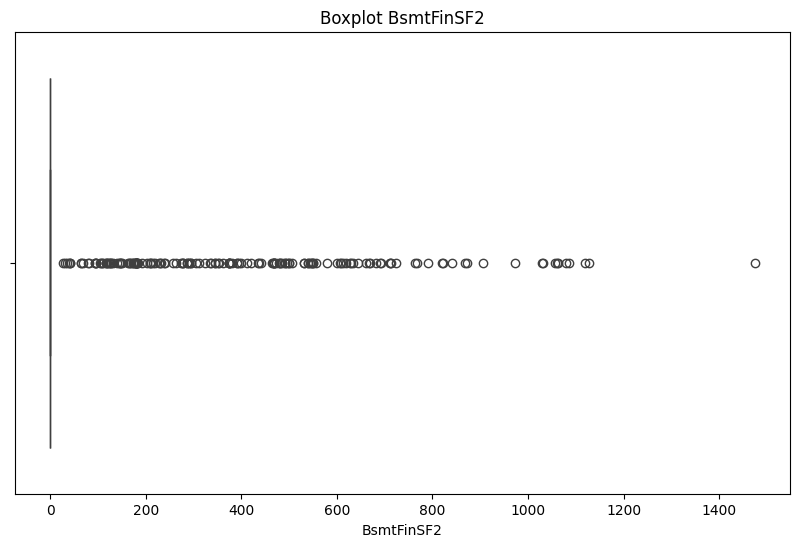

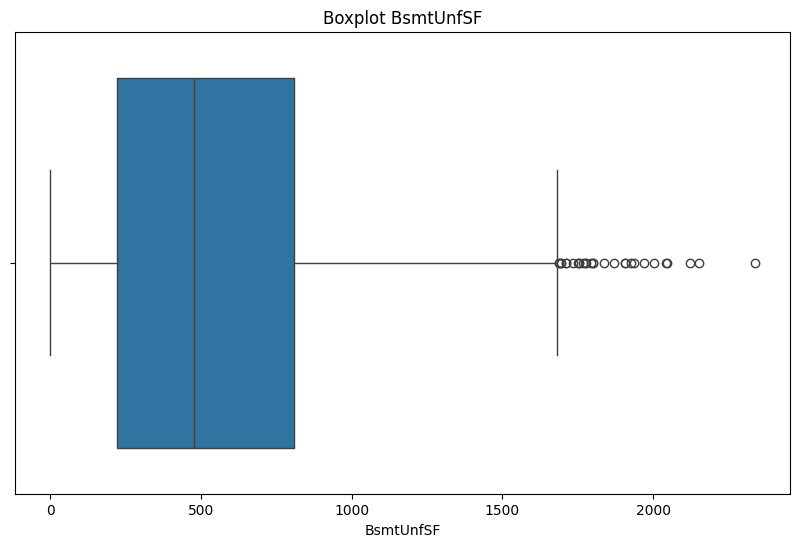

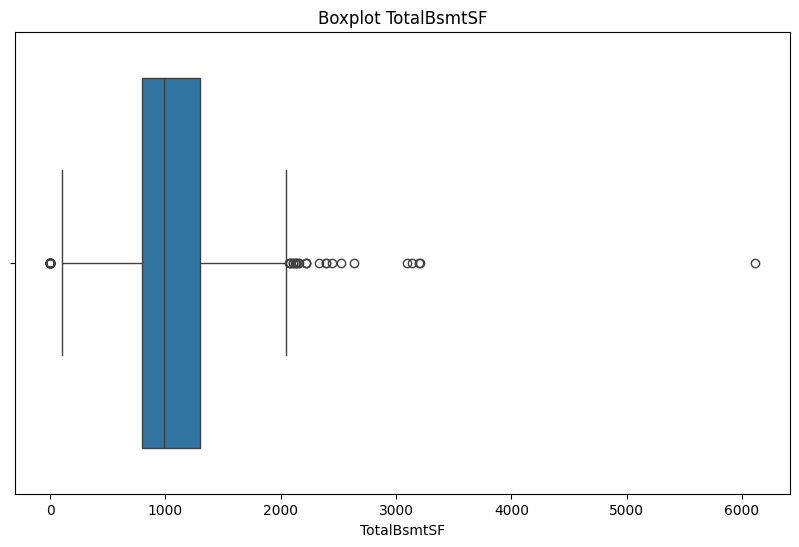

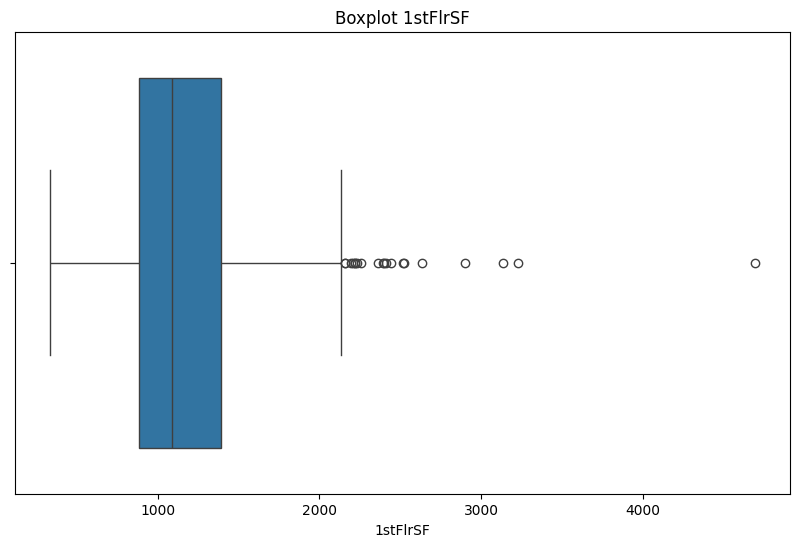

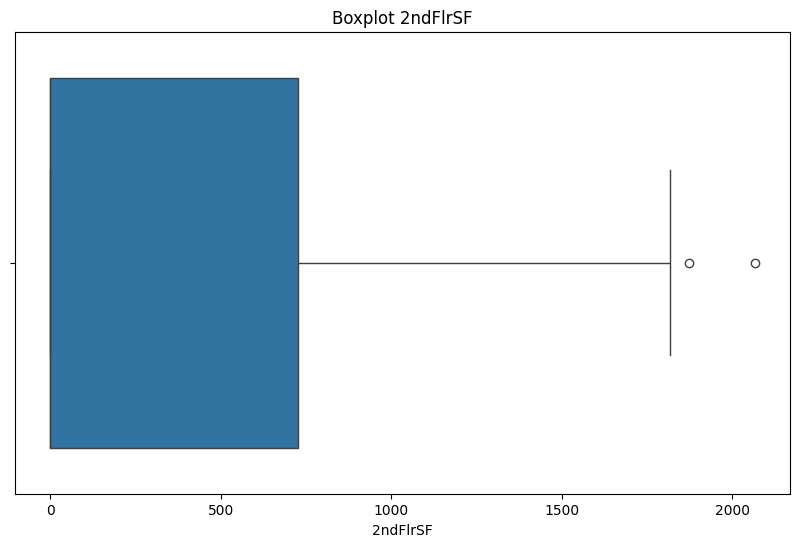

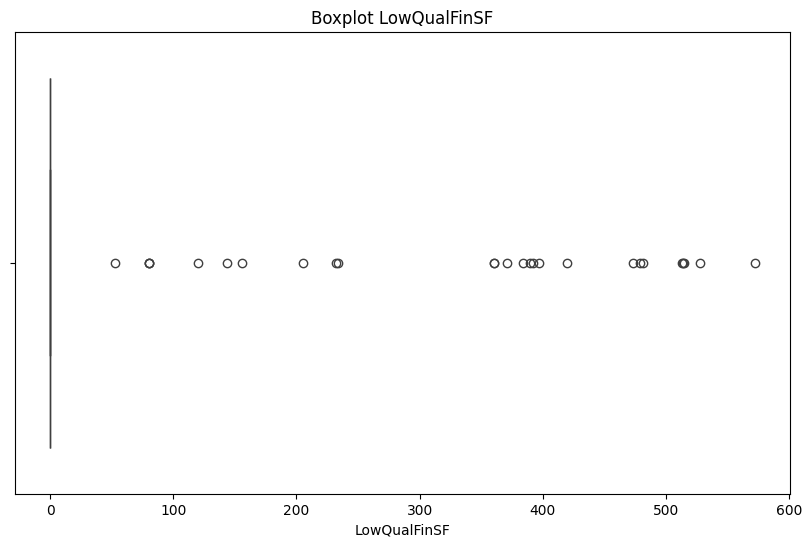

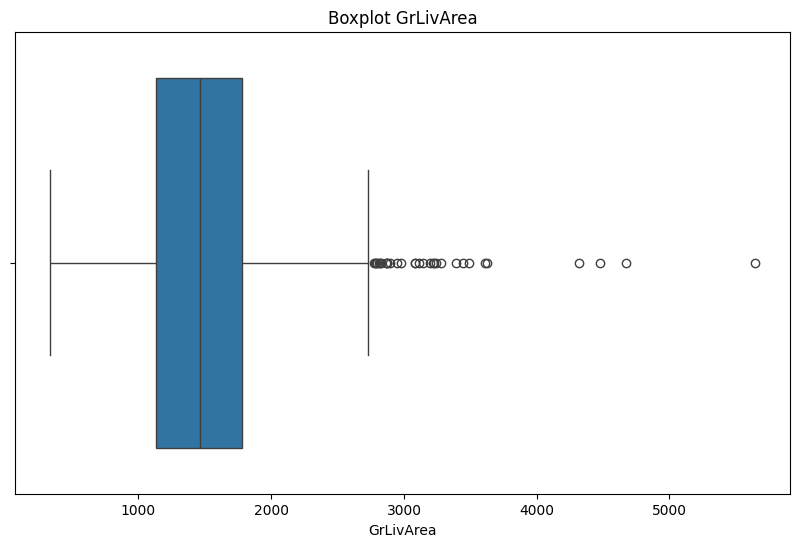

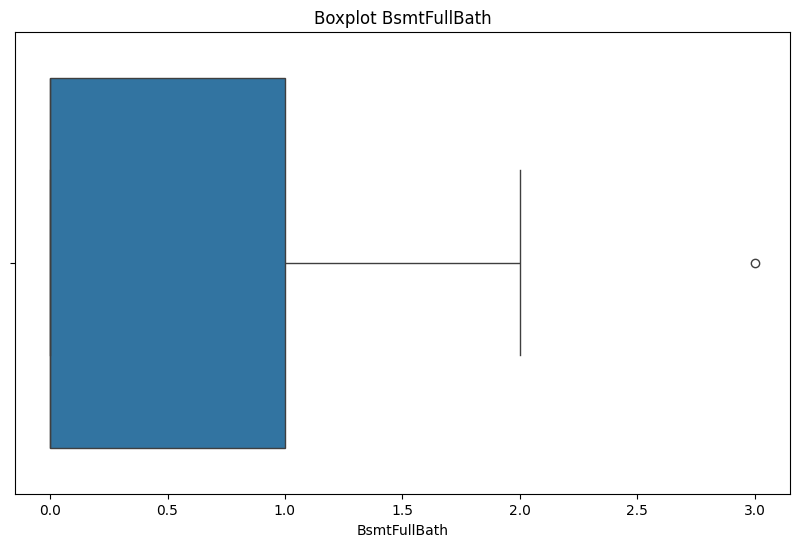

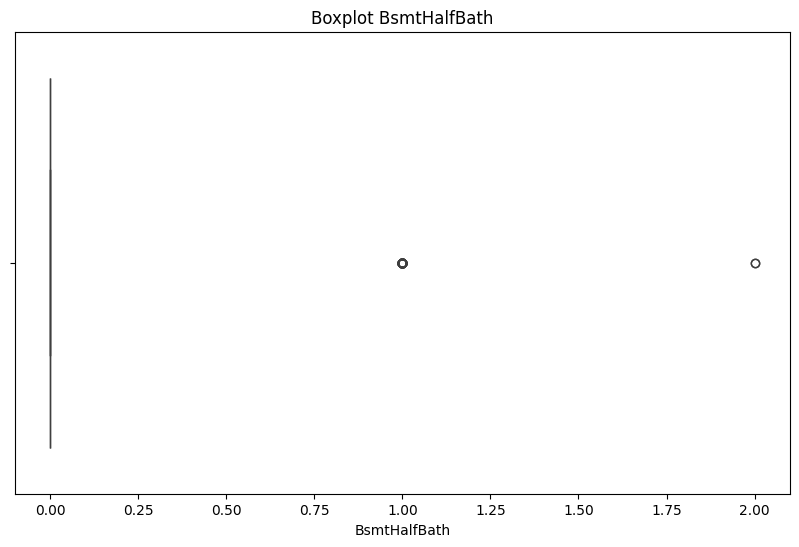

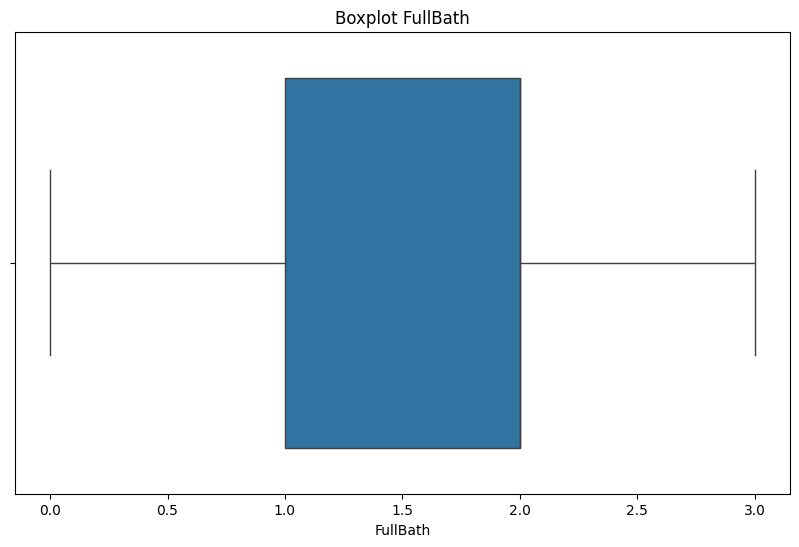

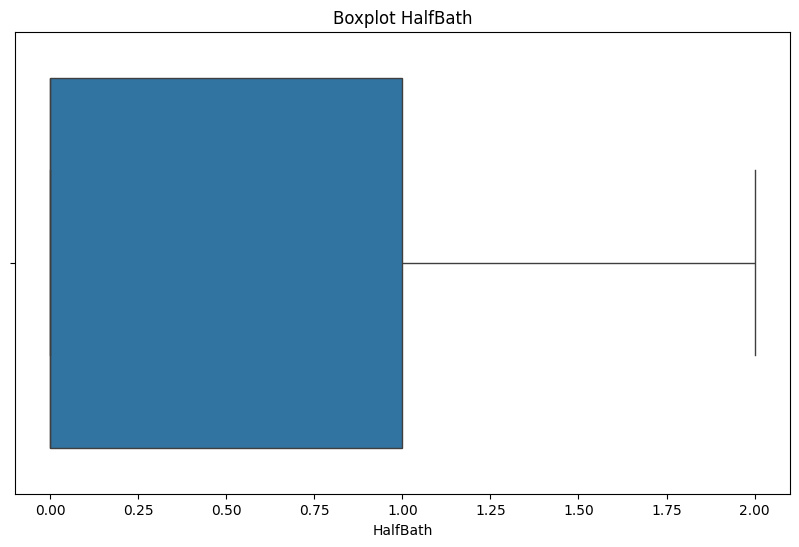

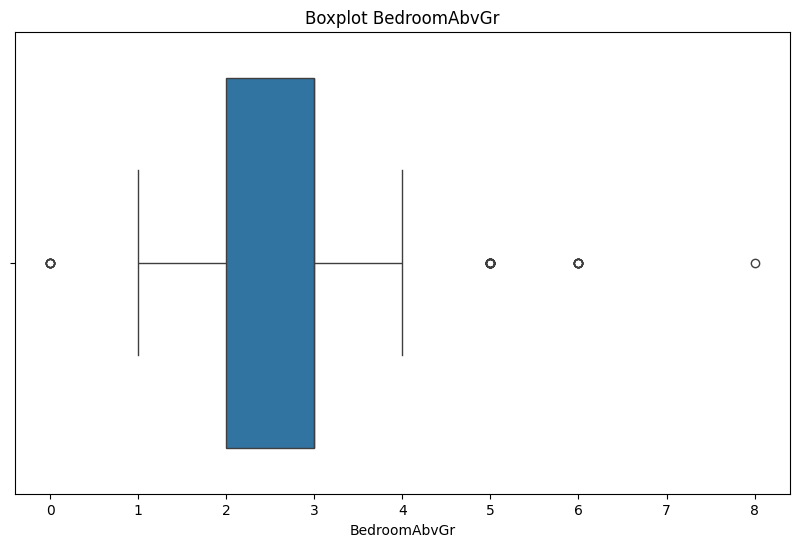

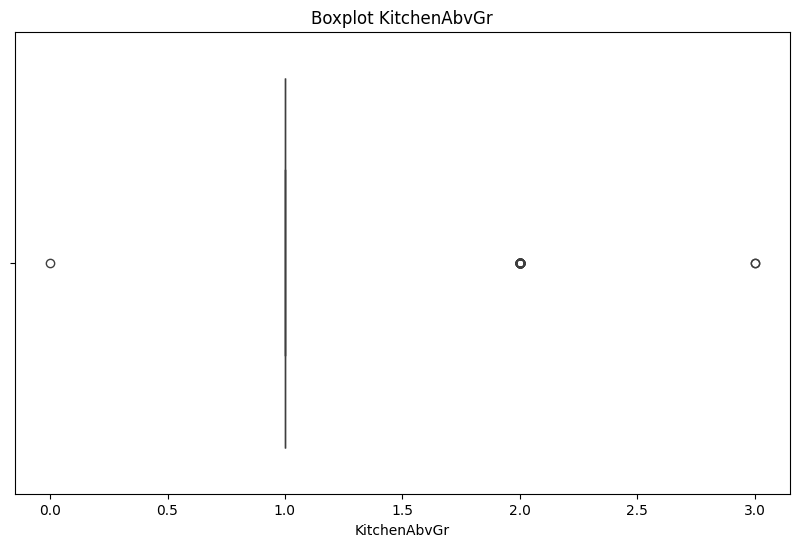

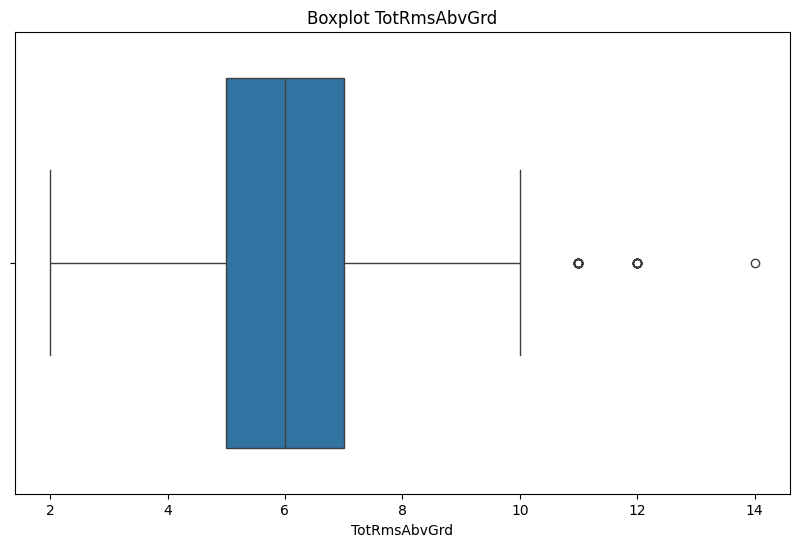

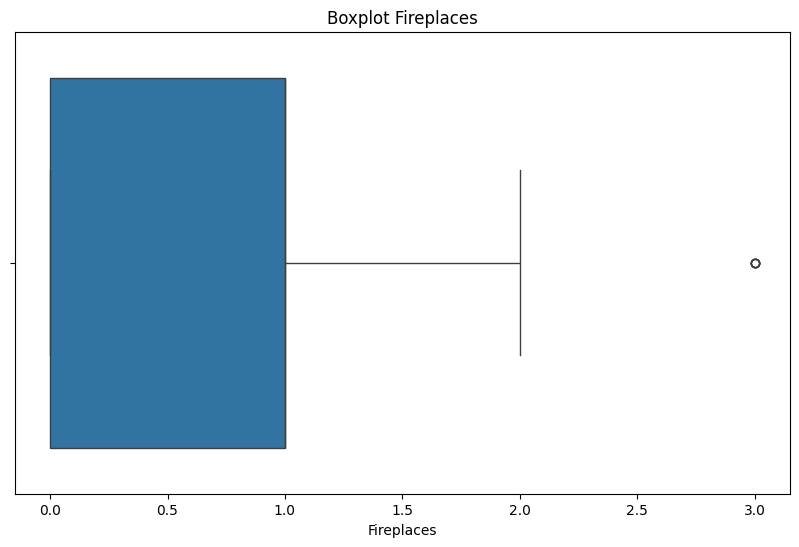

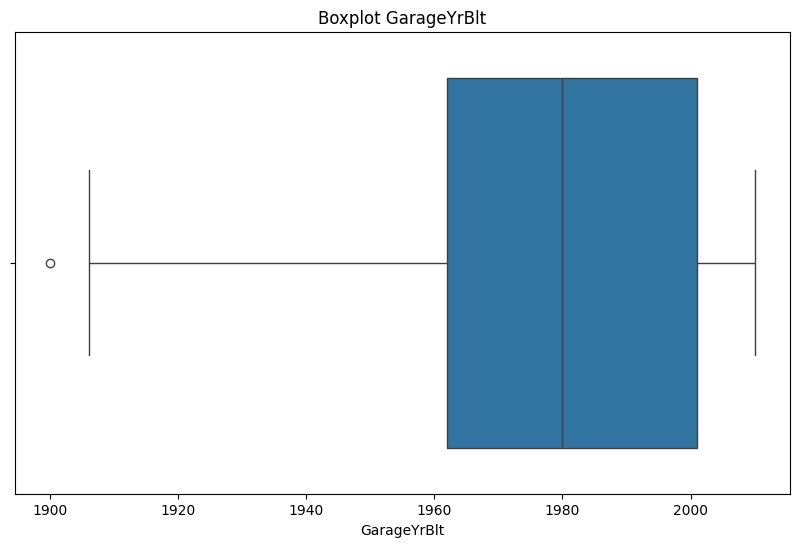

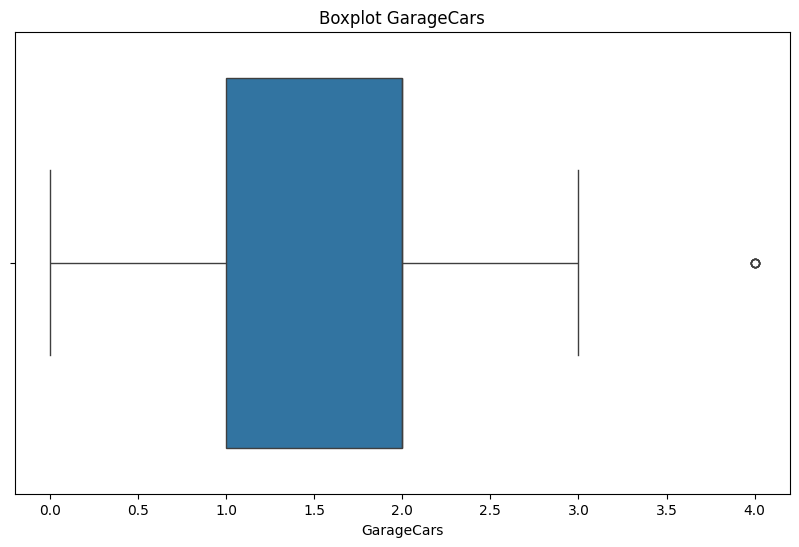

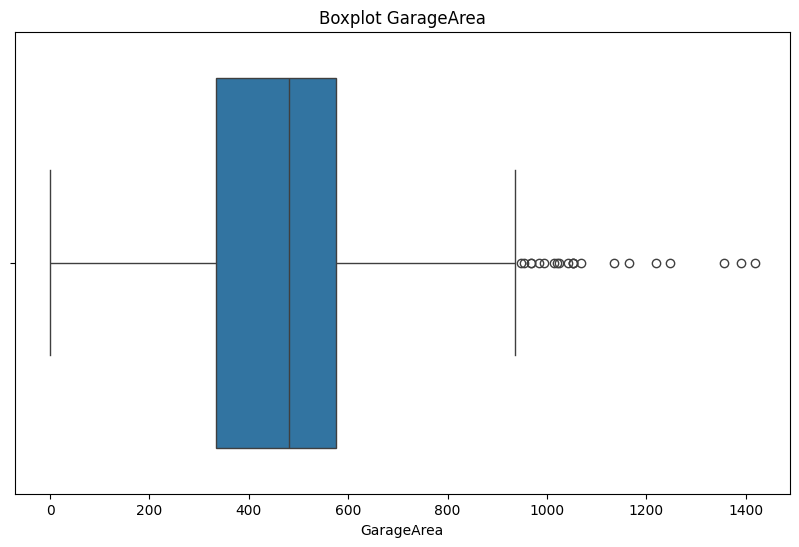

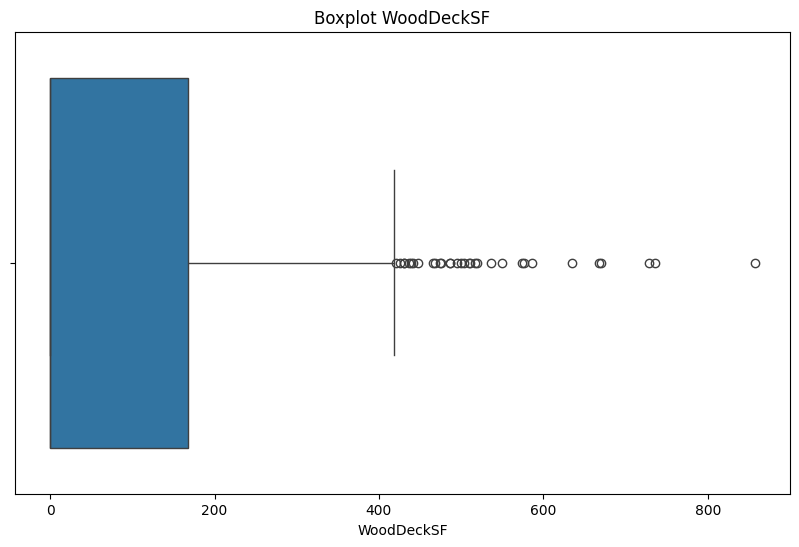

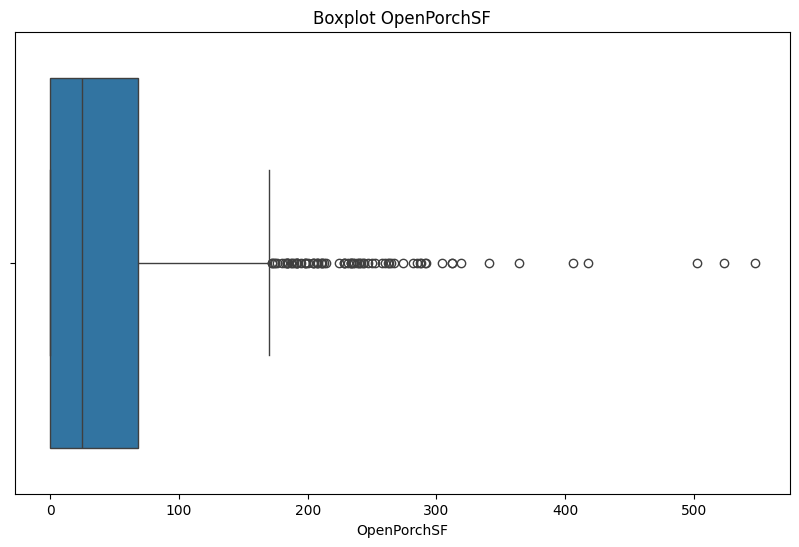

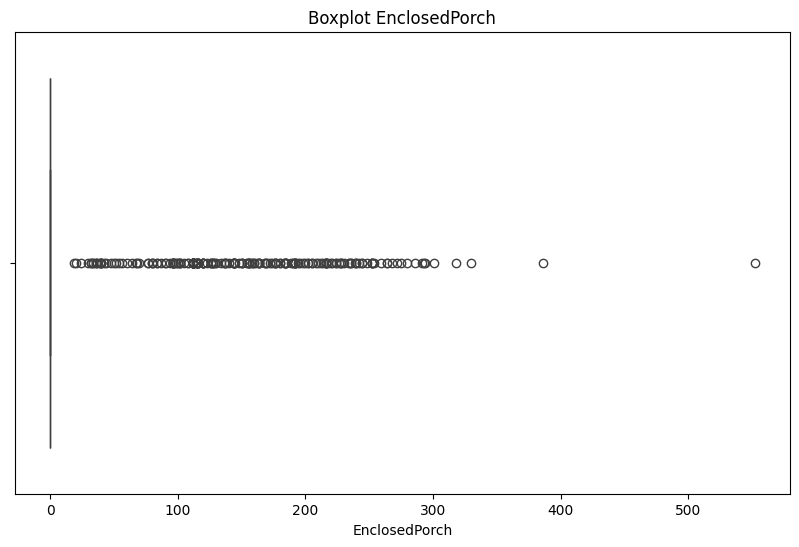

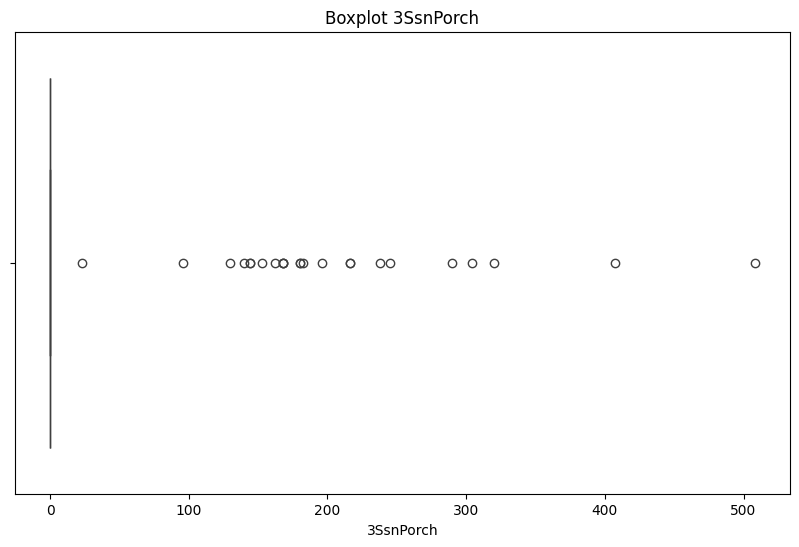

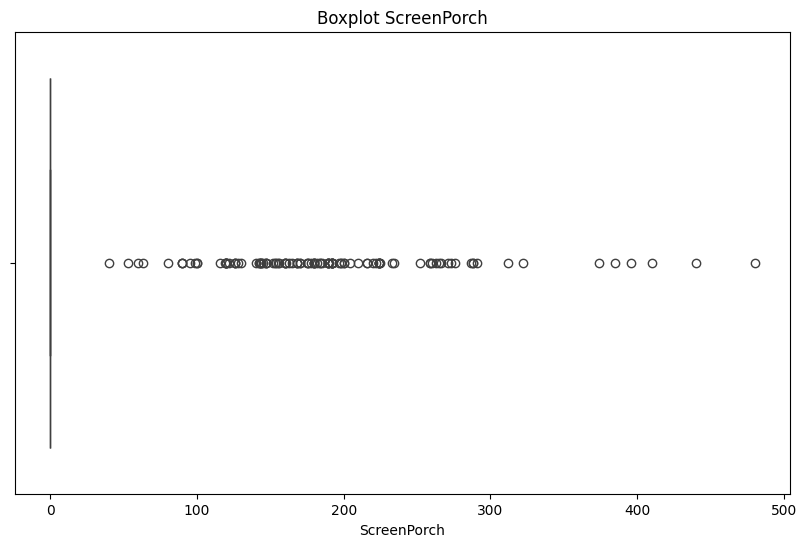

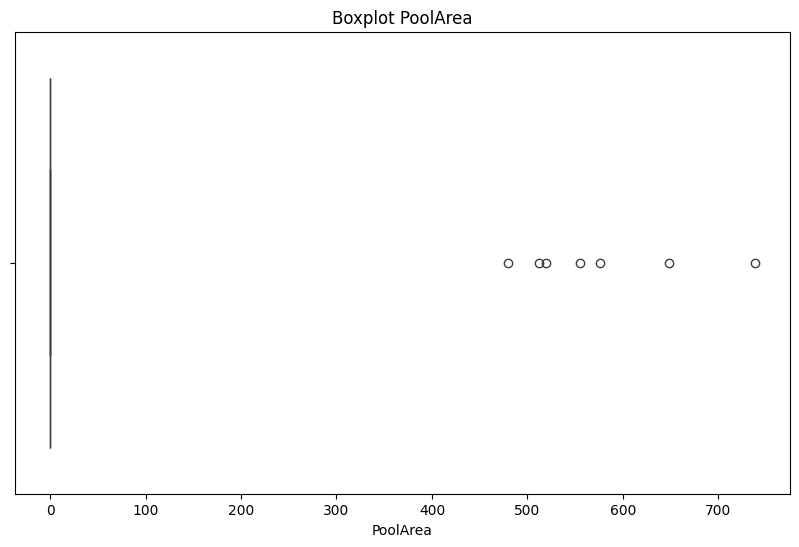

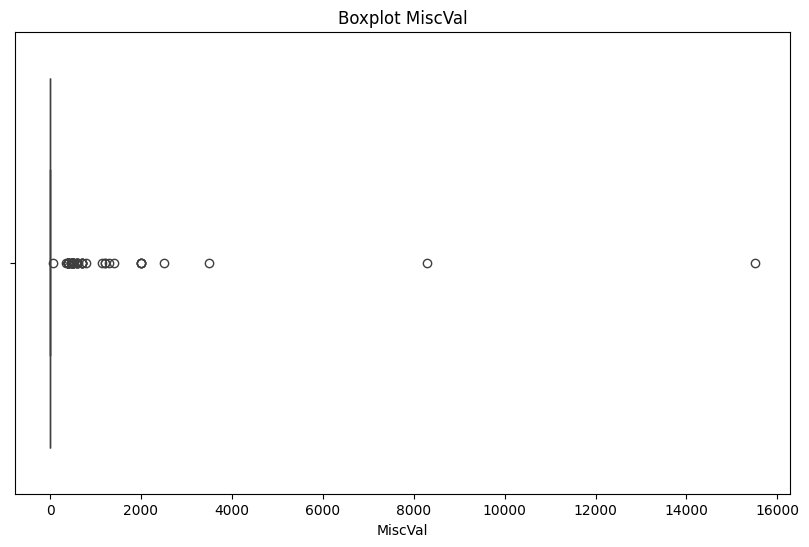

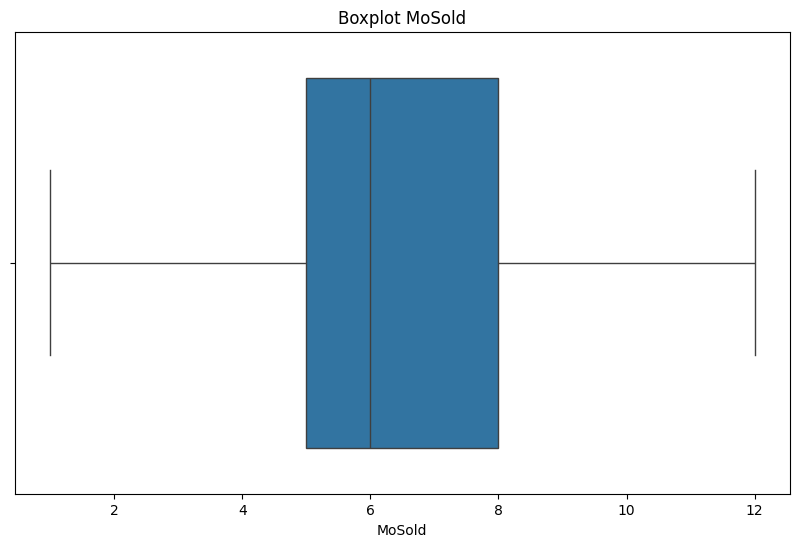

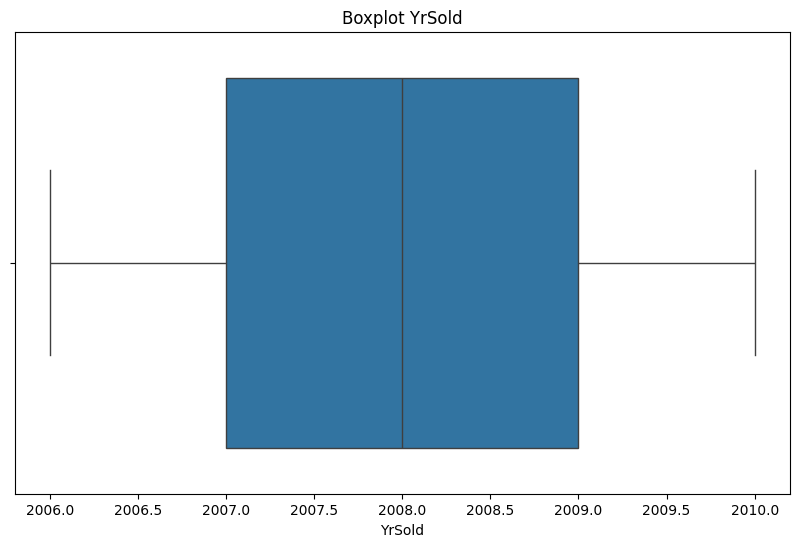

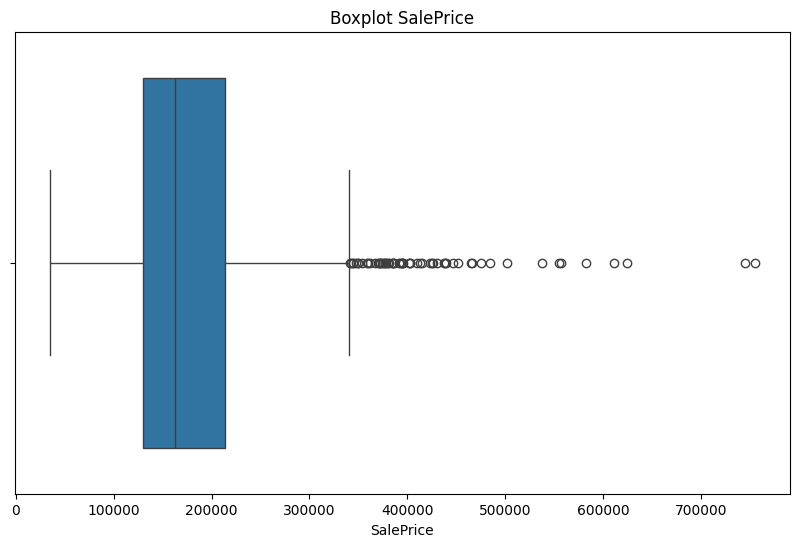

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[feature])
  plt.title(f"Boxplot {feature}")
  plt.show()

langkah-langkah umum untuk mendeteksi dan menangani outlier menggunakan metode IQR.
1. Menghitung IQR, Q1, dan Q3
*   Q1 (Quartile 1): Nilai di persentil ke-25 data
*   Q3 (Quartile 3): Nilai di persentil ke-75 data.
*   IQR: Rentang antara Q3 dan Q1 (IQR = Q3 - Q1).

2. Menentukan Batas Bawah dan Batas Atas
*   Batas Bawah: Q1 - 1.5 * IQR
*   Batas Atas: Q3 + 1.5 * IQR

In [ ]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
IQR

,0
Id,729.50
MSSubClass,50.00
LotFrontage,19.00
LotArea,4048.00
OverallQual,2.00
OverallCond,1.00
YearBuilt,46.00
YearRemodAdd,37.00
MasVnrArea,164.25
BsmtFinSF1,712.25


In [ ]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom categorical
categorical_features = df.select_dtypes(include=["object"]).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1449,50,70.0,11767,4,7,1910,2000,0.0,0,...,TA,Min2,Gd,Detchd,Unf,Fa,TA,Y,WD,Normal
1451,1452,20,78.0,9262,8,5,2008,2009,194.0,0,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1453,1454,20,90.0,17217,5,5,2006,2006,0.0,0,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Abnorml
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


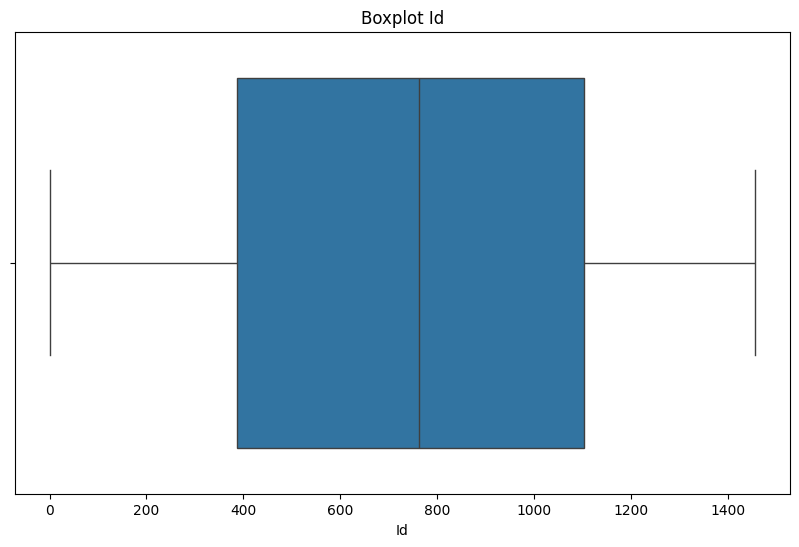

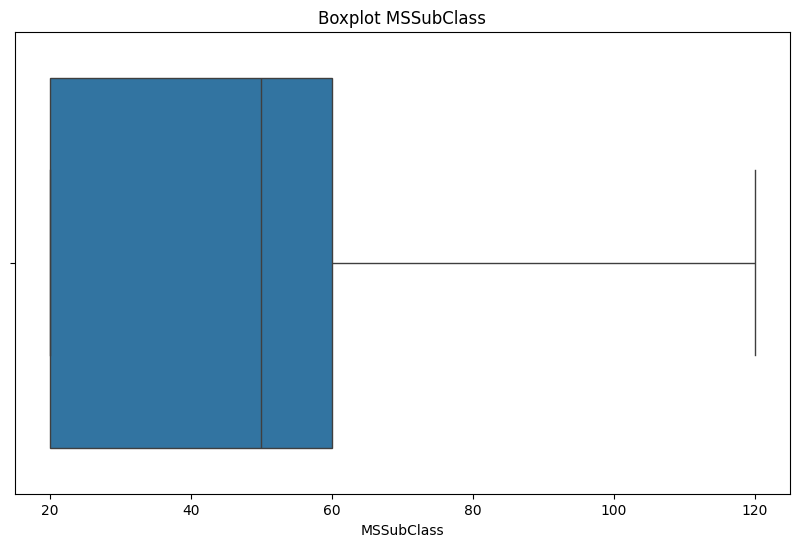

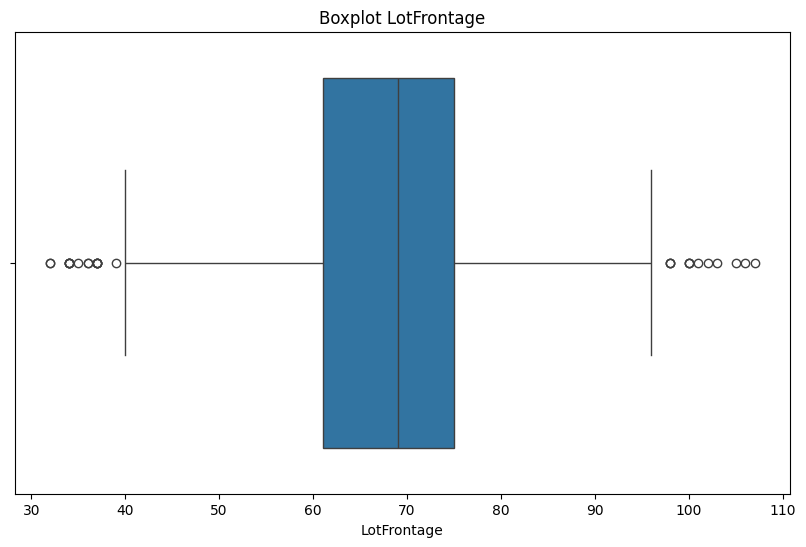

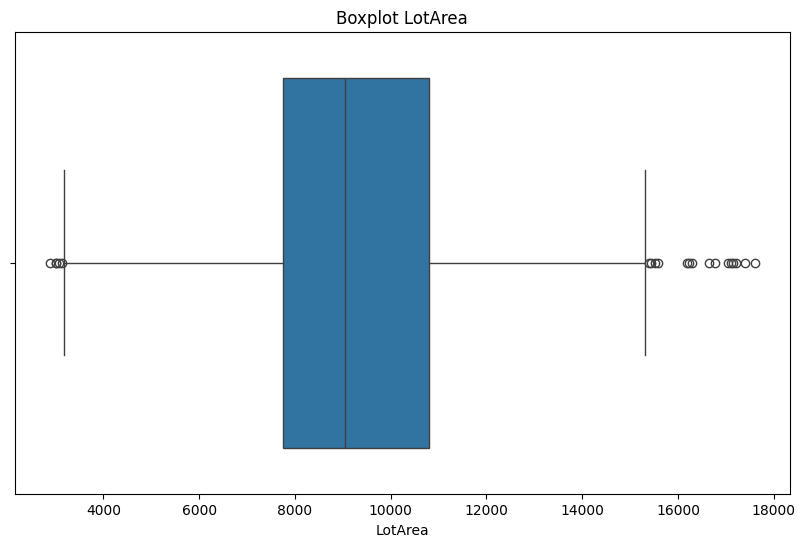

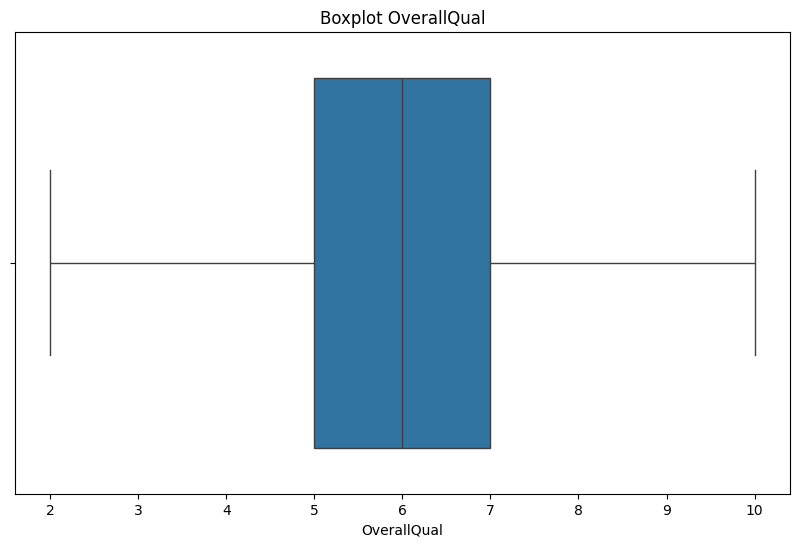

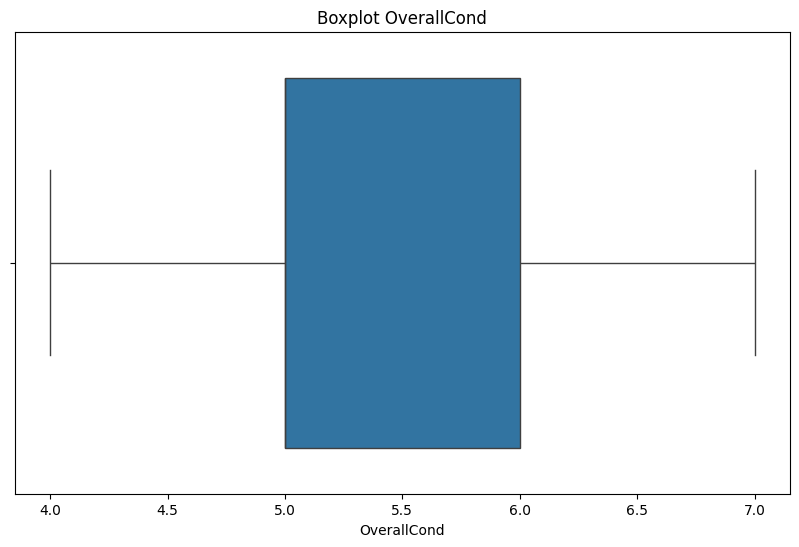

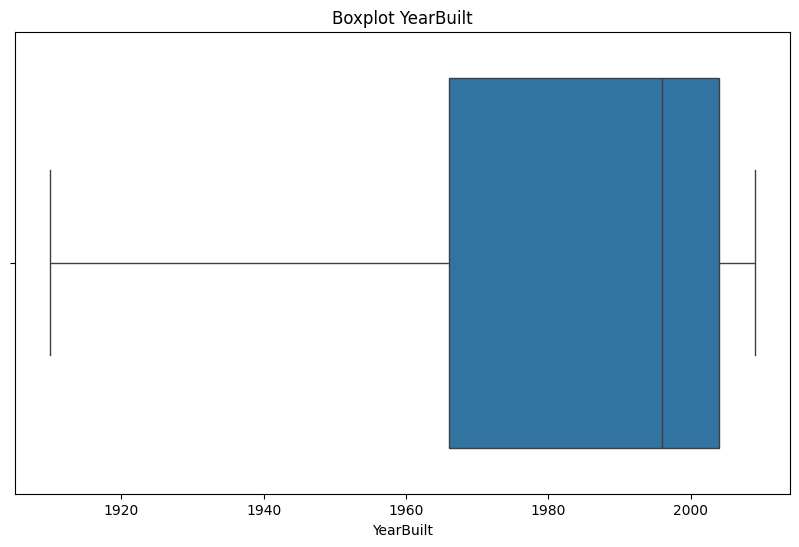

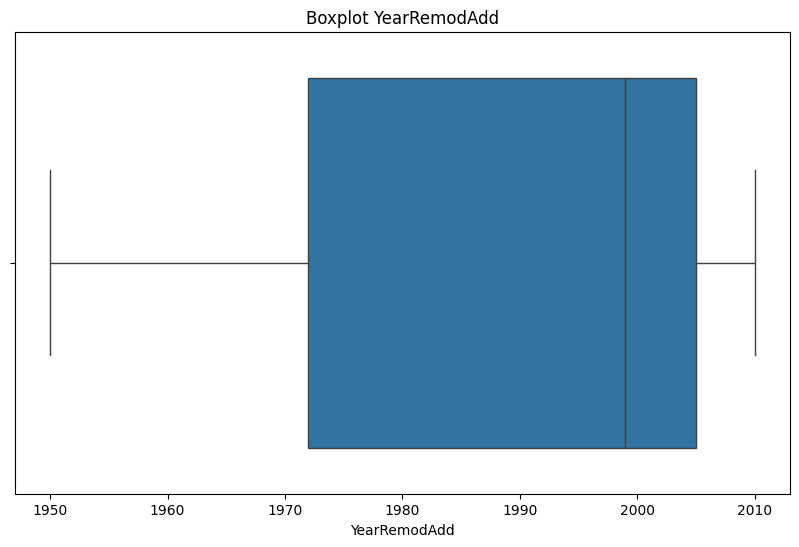

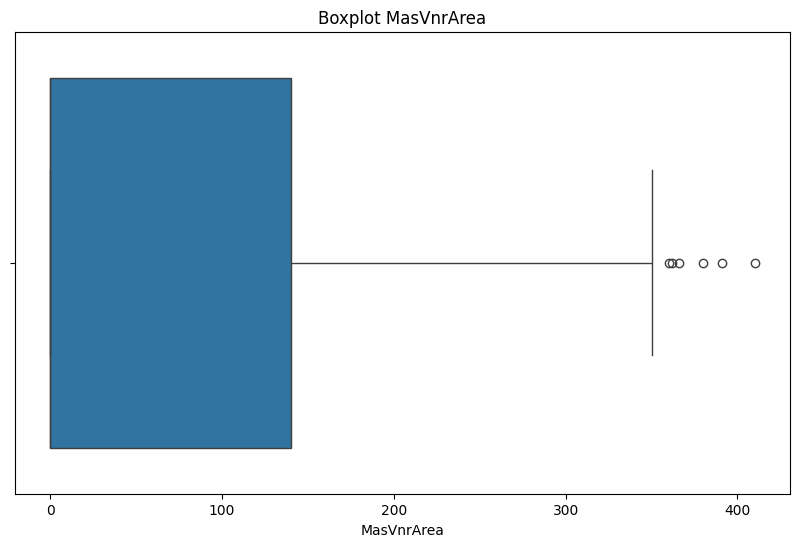

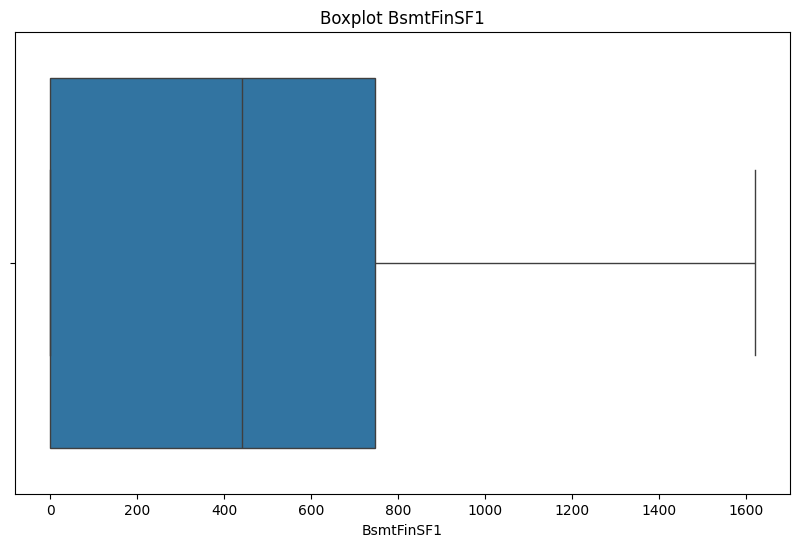

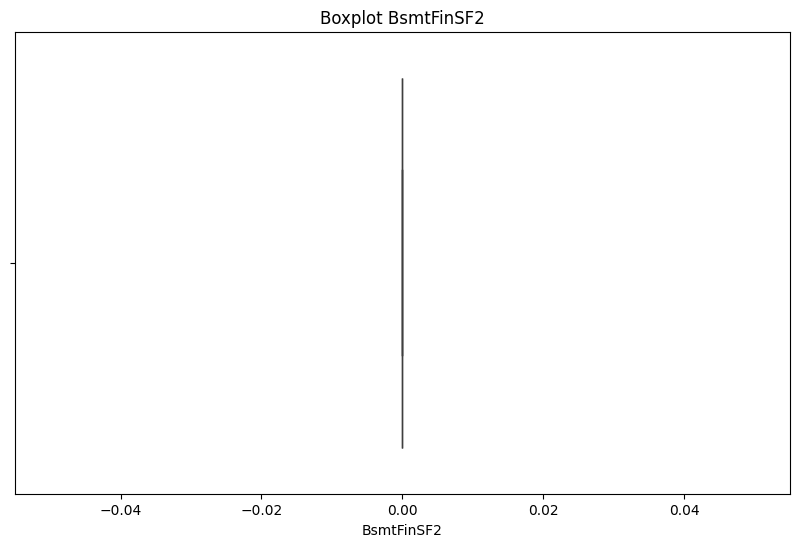

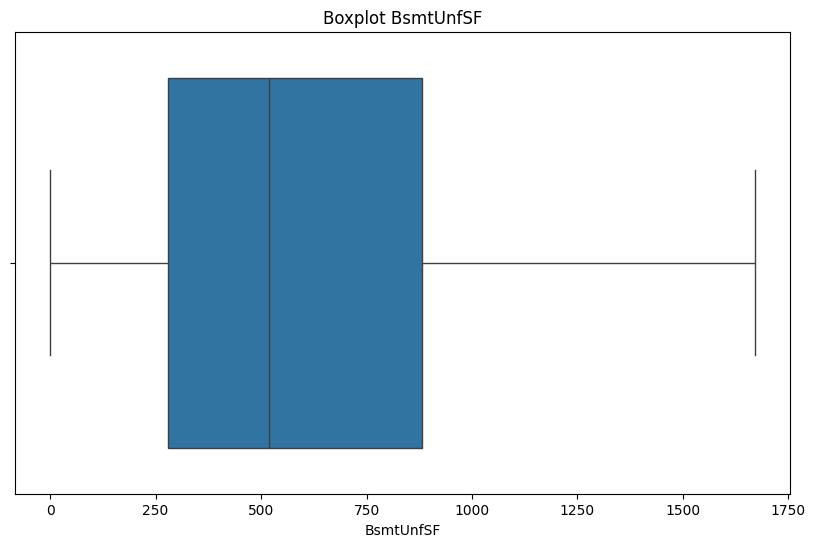

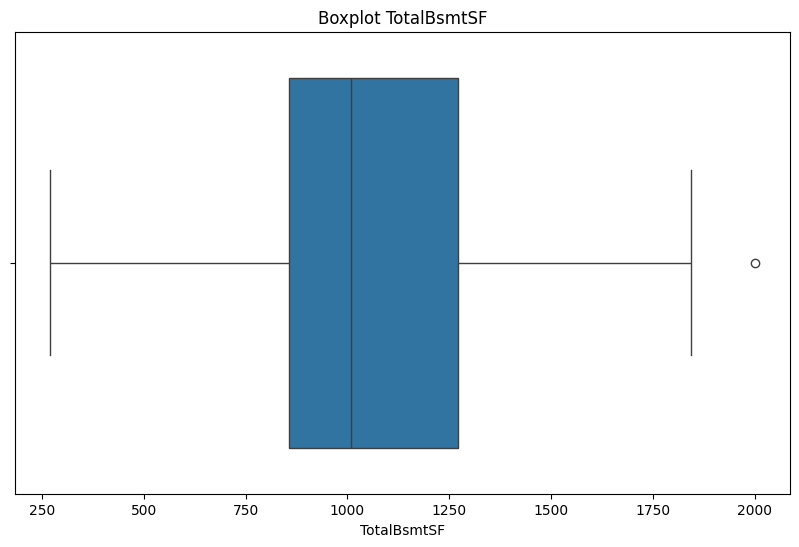

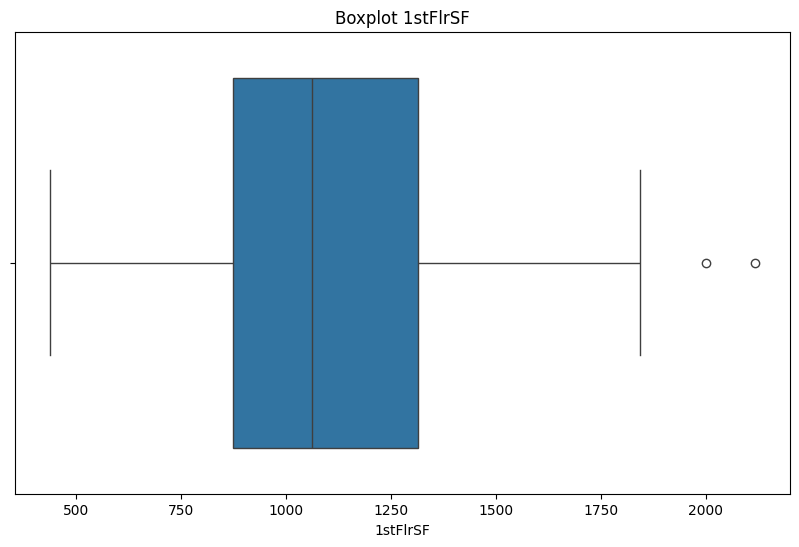

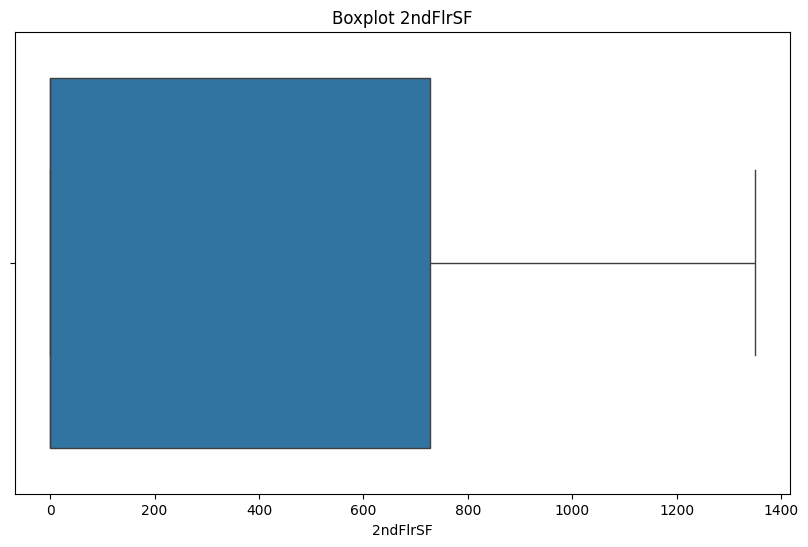

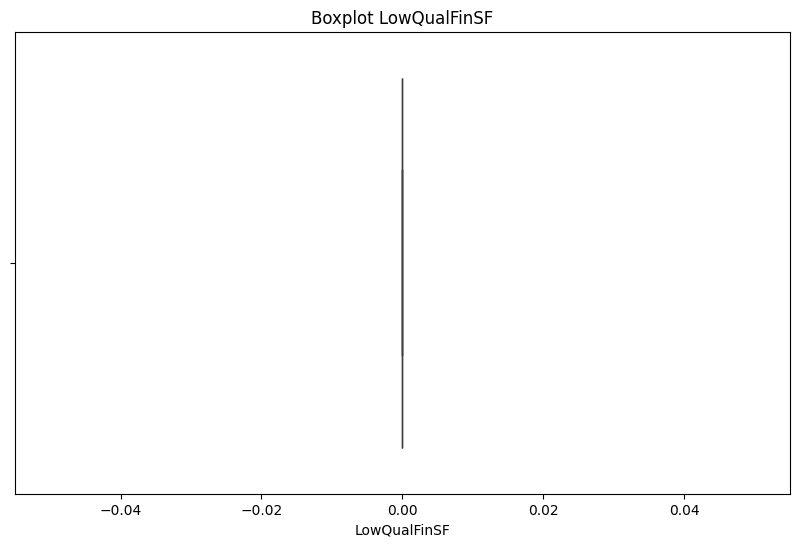

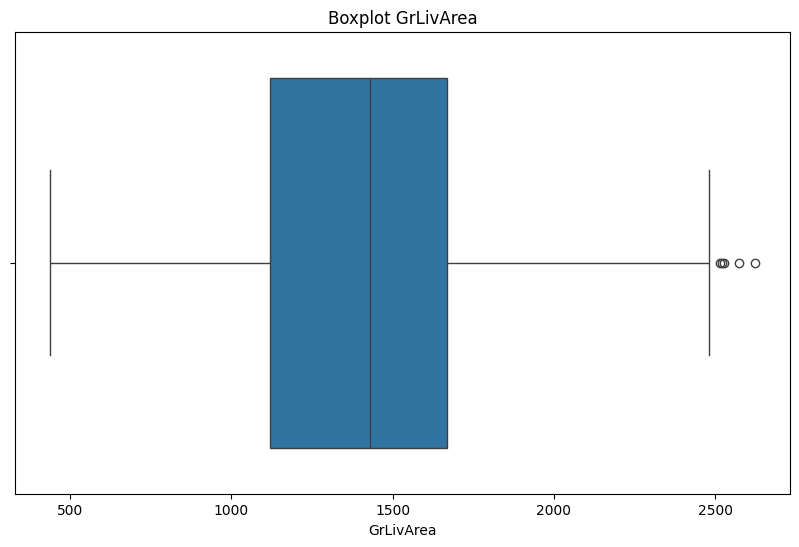

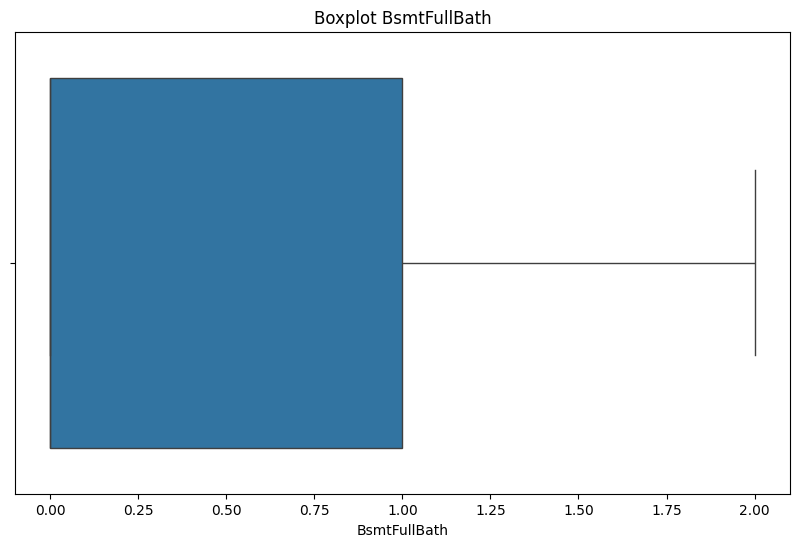

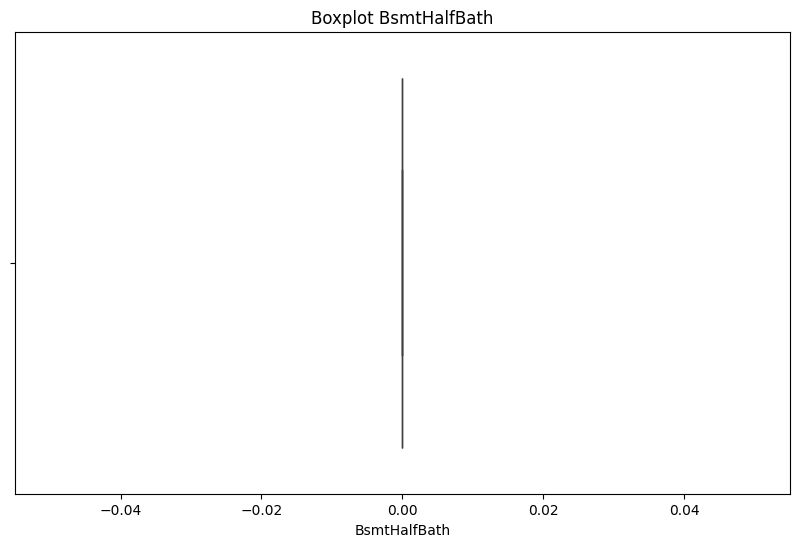

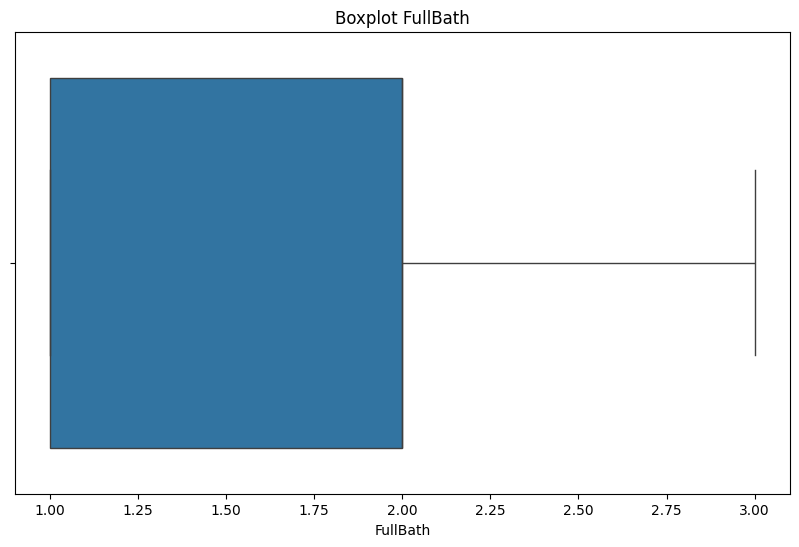

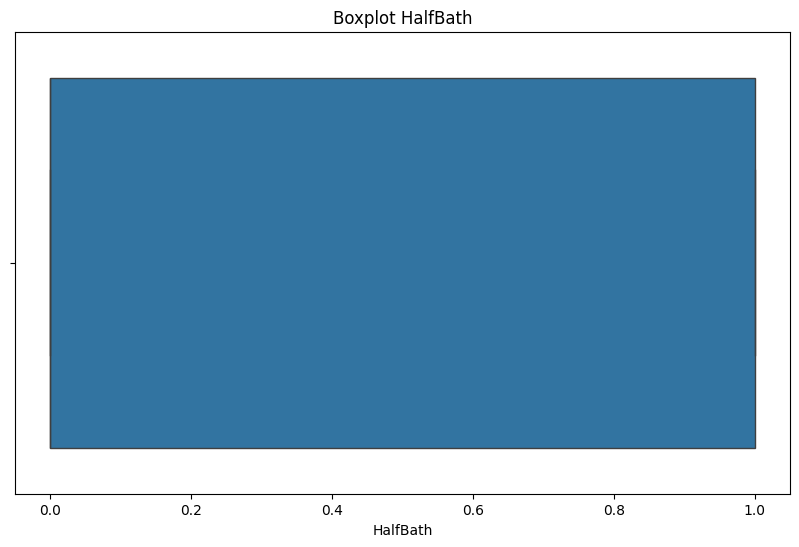

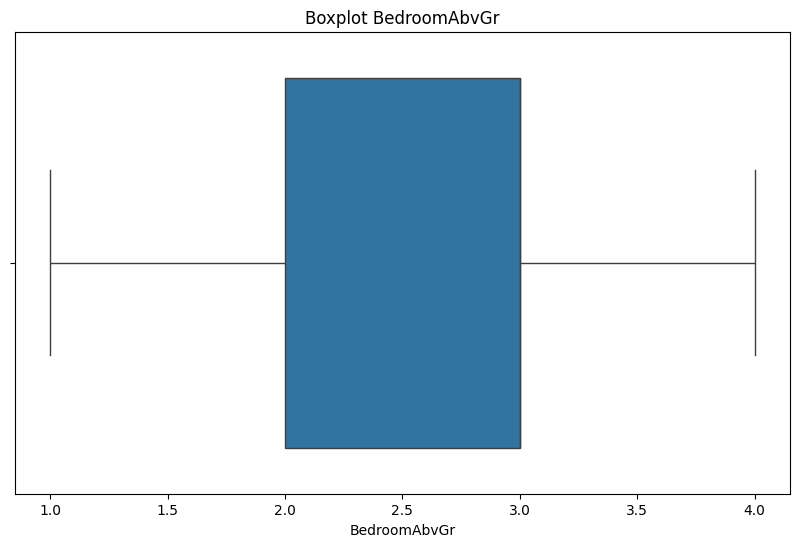

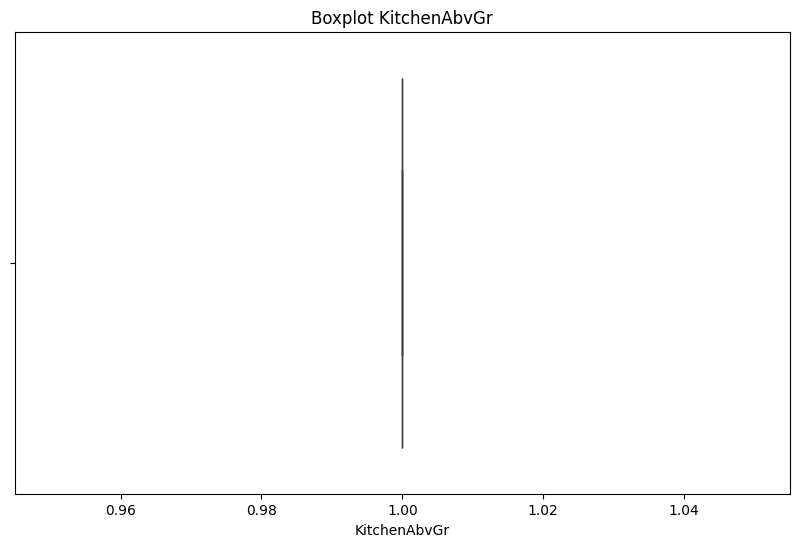

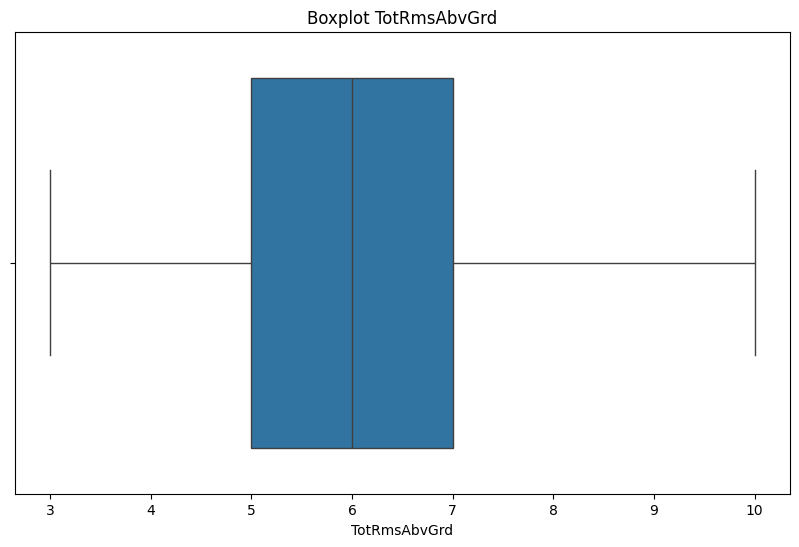

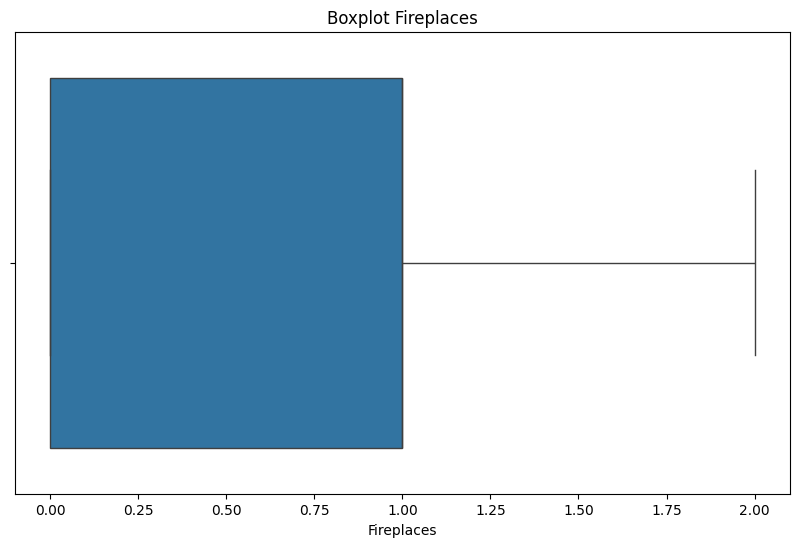

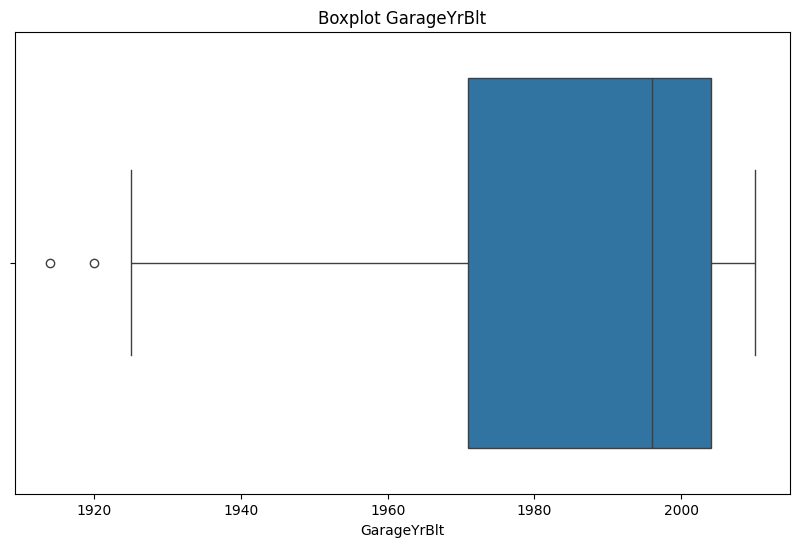

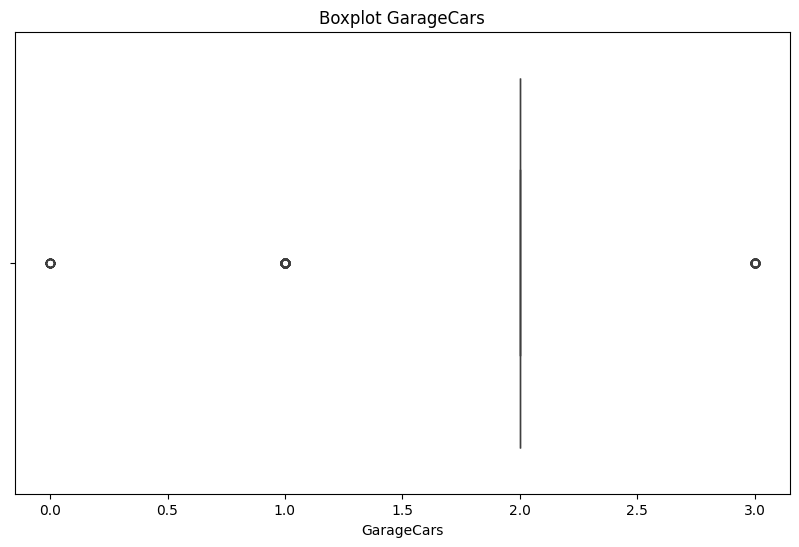

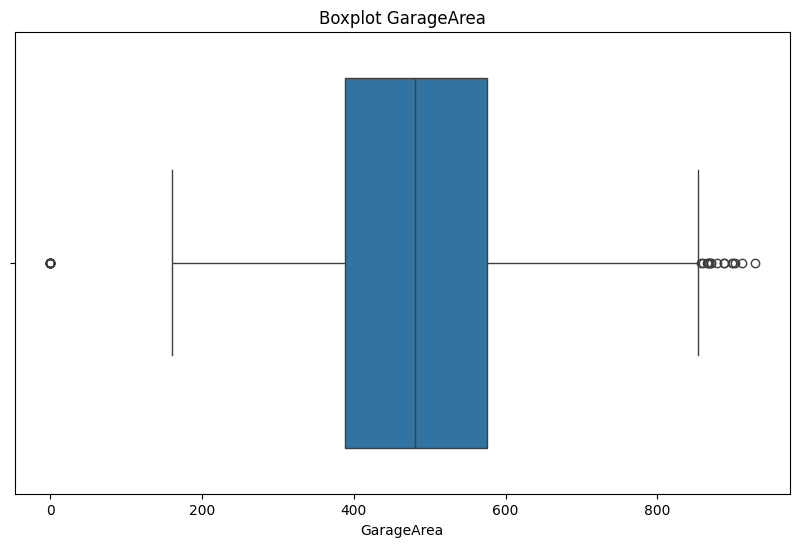

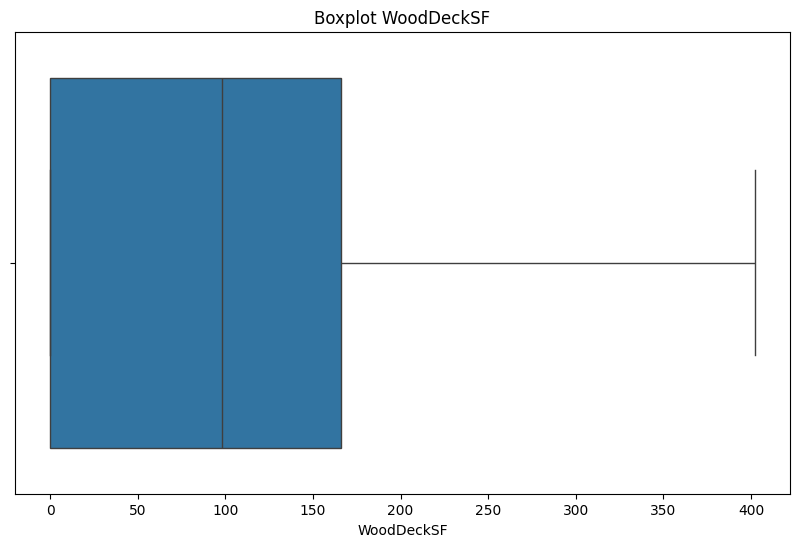

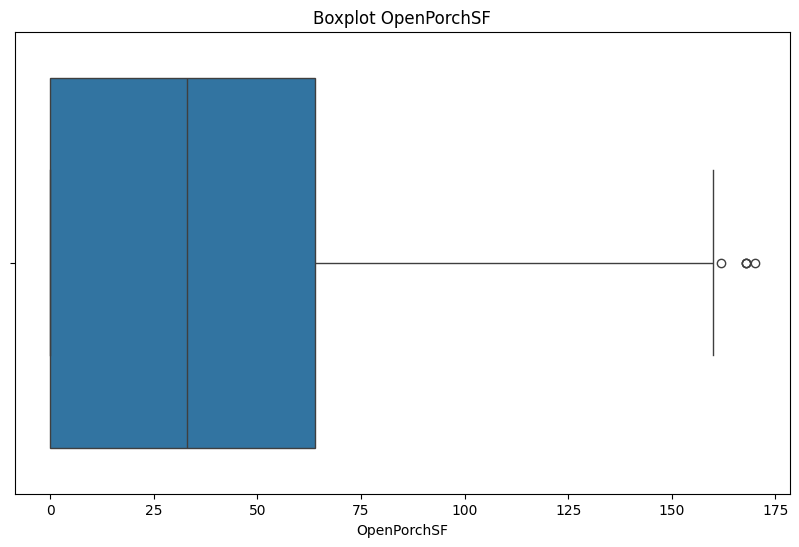

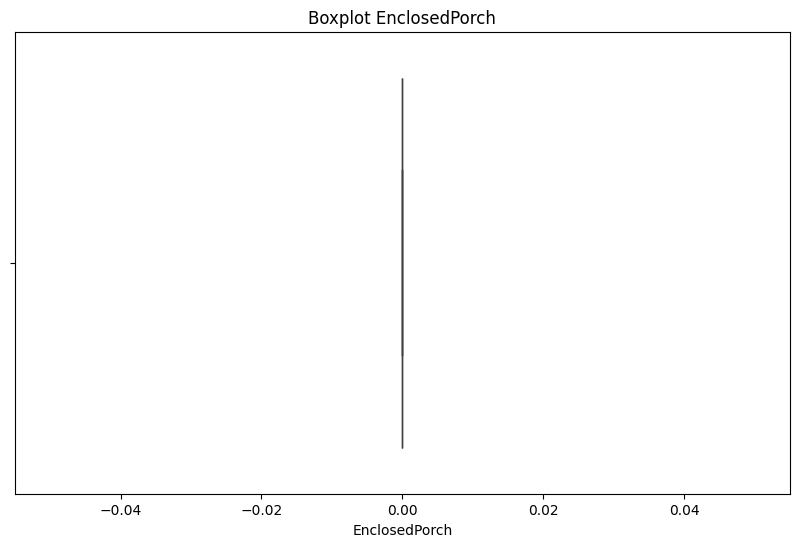

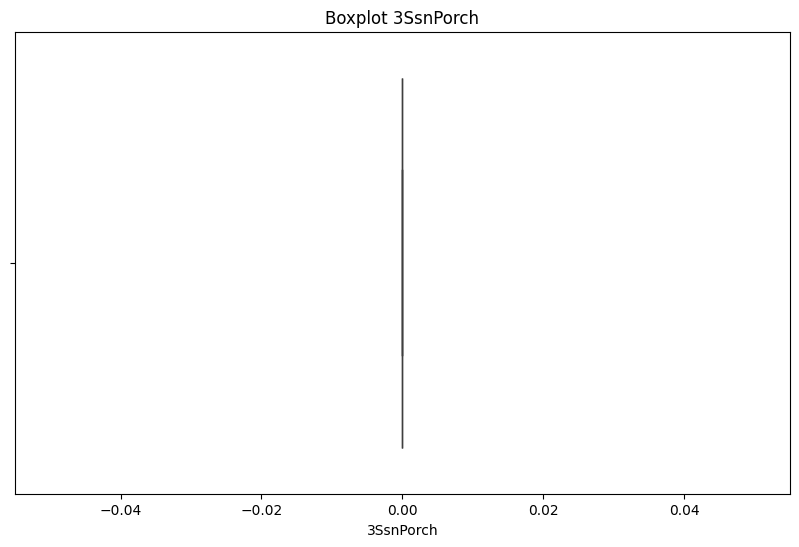

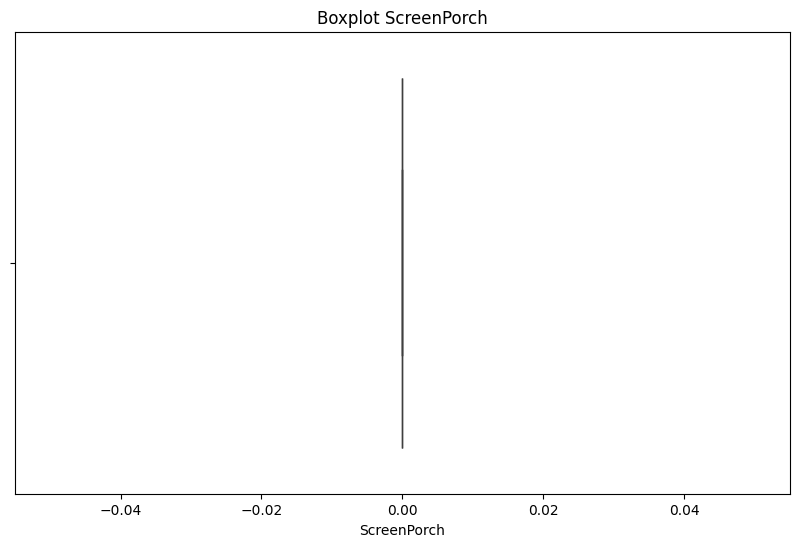

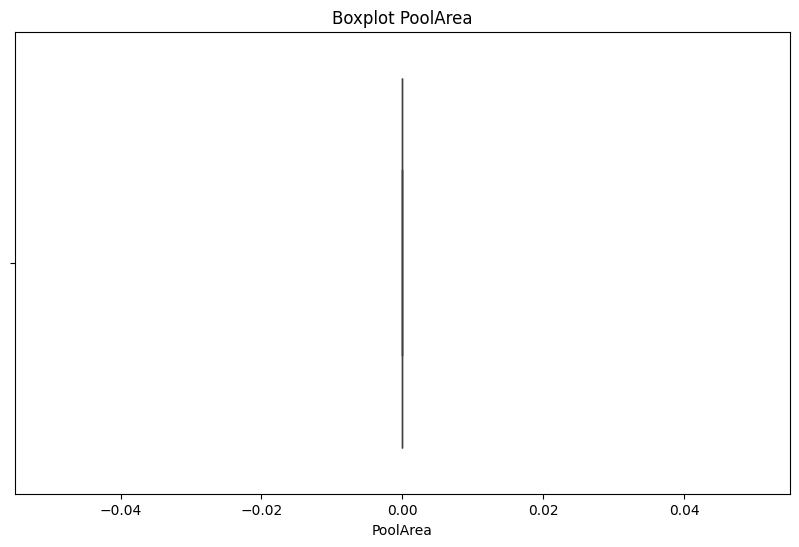

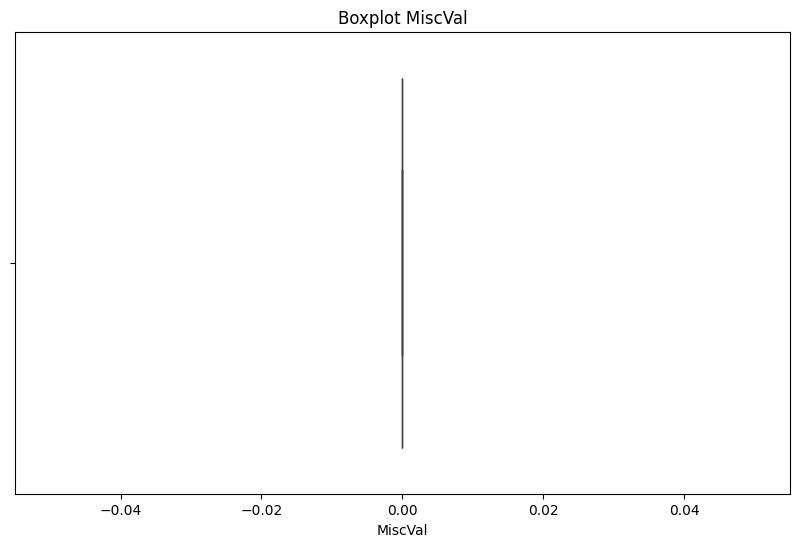

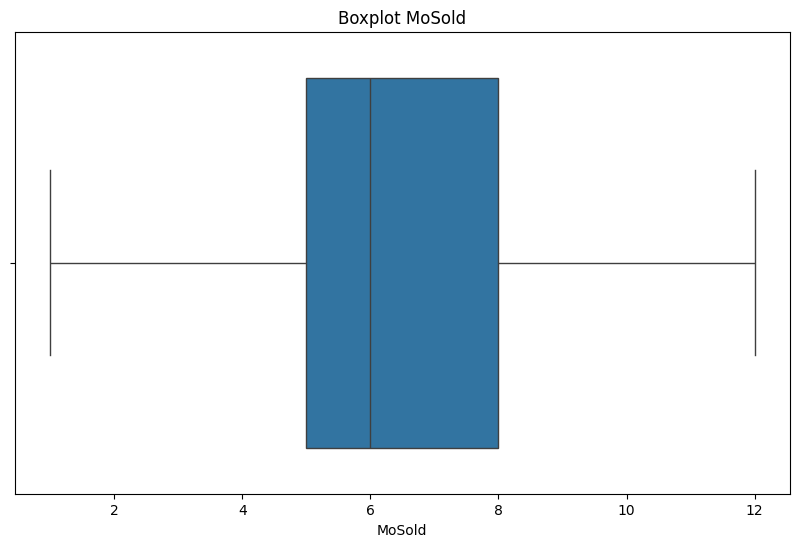

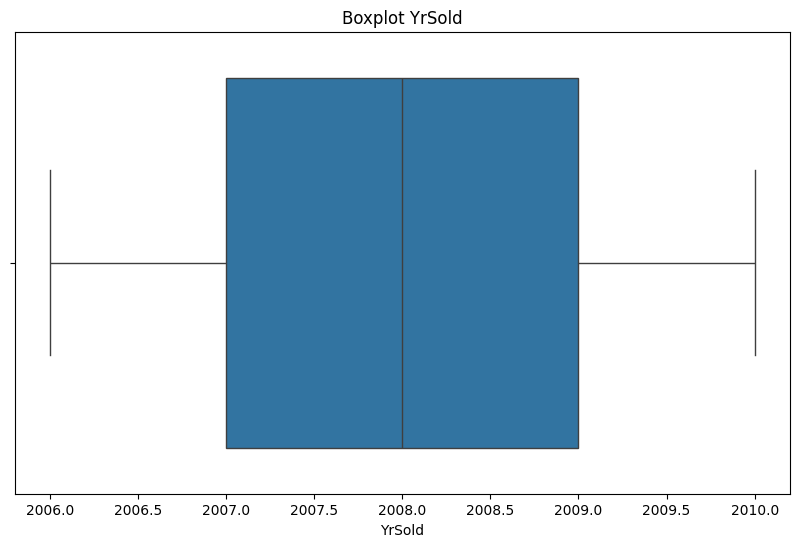

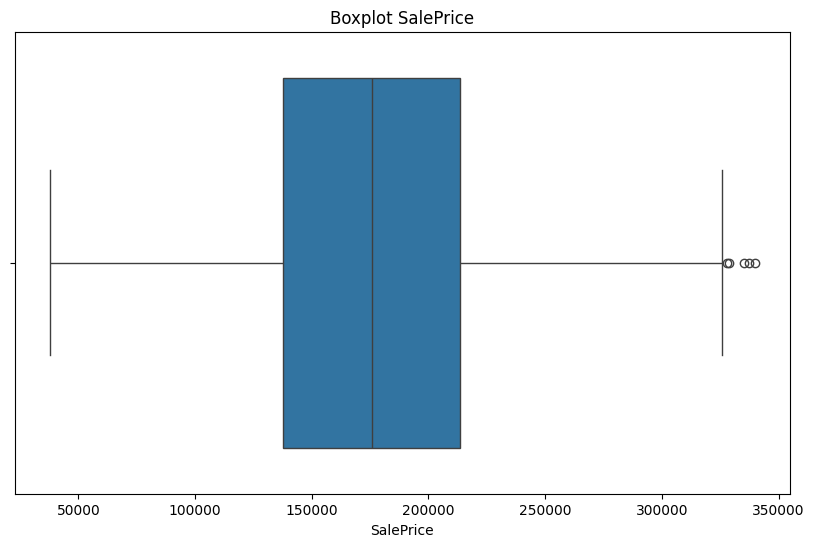

In [ ]:
for feature in df_filtered_numeric:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[feature])
  plt.title(f"Boxplot {feature}")
  plt.show()

Jika Anda tidak ingin menghapus outliers seperti contoh di atas, silakan gunakan metode agregasi

```
median = df['column_name'].median()
df['column_name'] = df['column_name'].apply(lambda x: median if x < (Q1 - 1.5  IQR) or x > (Q3 + 1.5  IQR) else x)
```

atau

```
# Mengganti outlier dengan nilai batas terdekat
df['column_name'] = df['column_name'].apply(lambda x: (Q1 - 1.5  IQR) if x < lower_bound else (Q3 + 1.5  IQR) if x > (Q3 + 1.5 * IQR) else x)


```

## Normalisasi dan Standardisasi Data

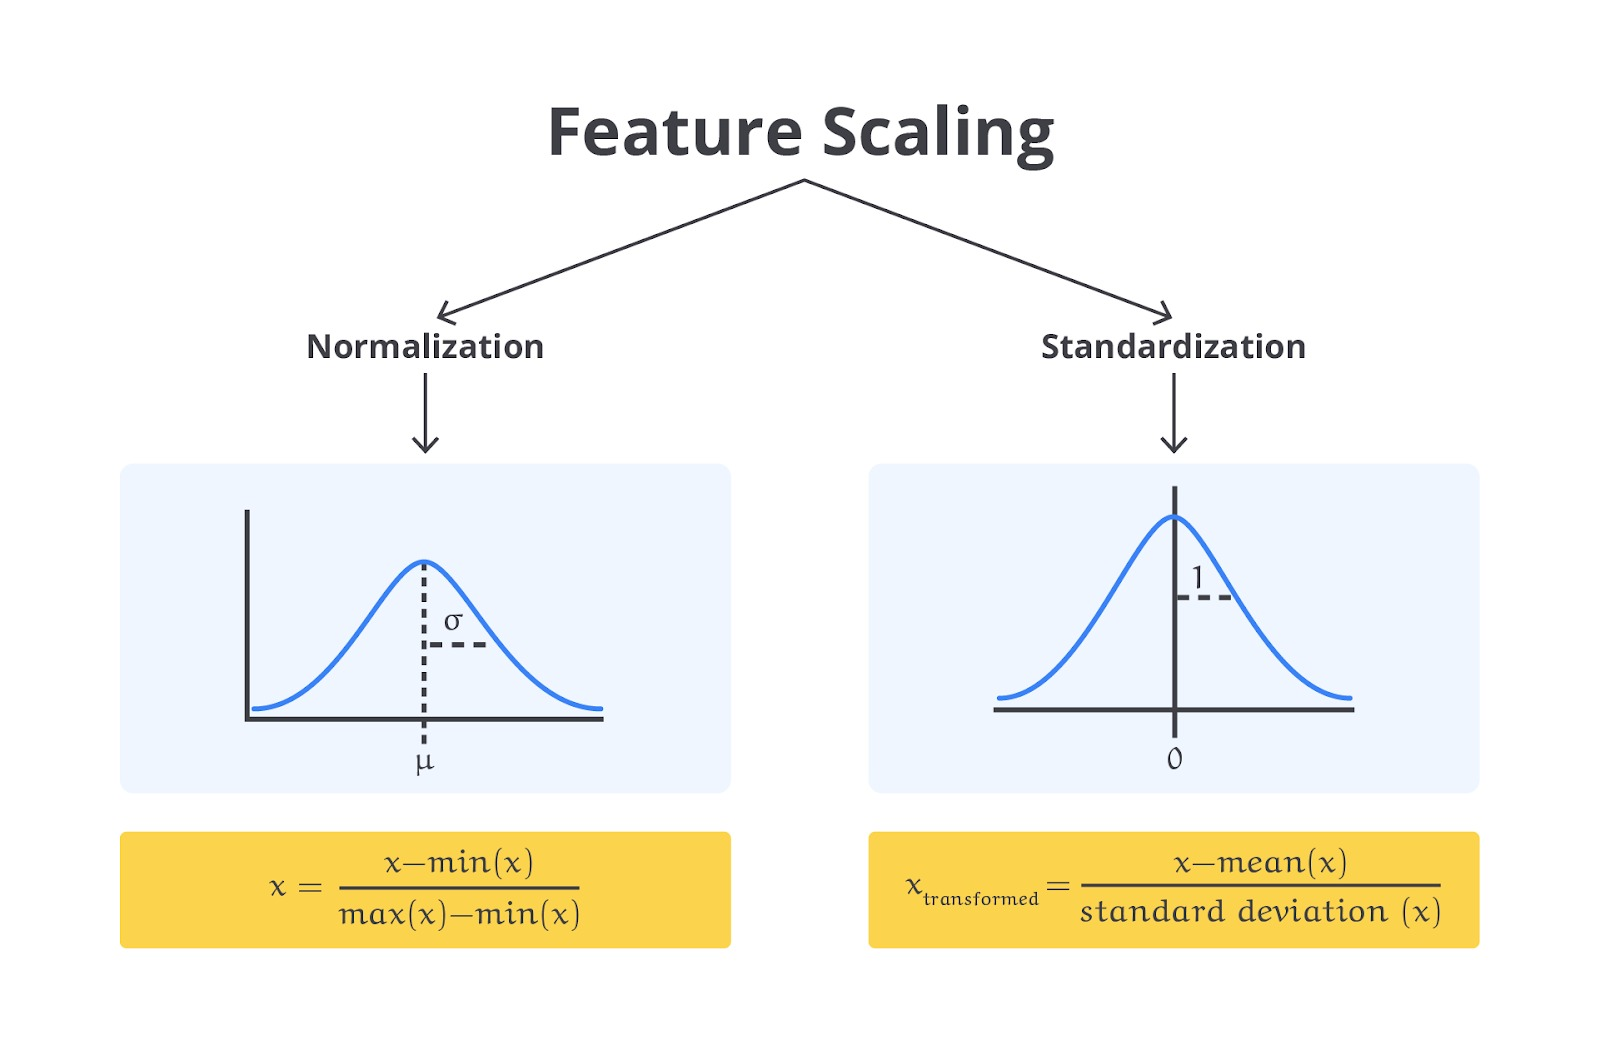

**1.   Normalisasi**
 (juga dikenal sebagai penskalaan min-max) bertugas untuk mengubah fitur sehingga nilainya berada dalam rentang tertentu, biasanya antara 0 dan 1.

Berikut poin-poin yang menjadi pertimbangan ketika akan melakukan normalisasi.
*   Fitur dengan Skala Berbeda: ketika fitur memiliki skala yang sangat berbeda dan Anda ingin menyamakan rentangnya.

*   Model Berbasis Jarak: jika Anda menggunakan algoritma yang bergantung pada jarak, seperti K-Nearest Neighbors (KNN) atau K-Means clustering, normalisasi dapat membantu karena model ini sensitif terhadap skala fitur.

*   Data Tidak Terdistribusi Normal: jika data tidak terdistribusi normal dan Anda ingin mengubah data menjadi rentang yang lebih seragam.



**2. Standardisasi**
(juga dikenal sebagai penskalaan Z-score) bertugas untuk mengubah skala pada suatu fitur sehingga memiliki rata-rata 0 dan standar deviasi 1.

Berikut poin-poin yang menjadi pertimbangan ketika akan melakukan standardisasi.


*   Data Berdistribusi Normal: ketika data mengikuti distribusi normal (atau mendekati normal) dan Anda ingin mempertahankan informasi tentang distribusi data.
*   Model Berbasis Regresi: untuk algoritma yang memerlukan asumsi distribusi normal atau model linier seperti Regresi Linier, Standar, atau Logistic Regression.
*   Data dengan Skala Berbeda: ketika fitur memiliki skala yang berbeda tetapi Anda ingin memastikan bahwa setiap fitur berkontribusi secara proporsional tanpa mengubah distribusi data secara signifikan.






perbedaan dari standardisasi dengan normalisasi hanya pada rentangnya.


*   Normalisasi: mengubah data ke dalam rentang [0, 1]. Ideal untuk model berbasis jarak dan data yang tidak terdistribusi normal.
*   Standardisasi: mengubah data sehingga rata-rata menjadi atau mendekati 0 dan standar deviasi menjadi 1. Hal ini membantu model yang memerlukan distribusi normal atau data dengan skala berbeda menjadi lebih ideal pada proses pelatihannya.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df[numeric_features]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,-0.923836,0.439408,0.0,0.0,0.0,0.0,0.0,-1.633929,0.161764,0.535556
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,-0.923836,0.017501,0.0,0.0,0.0,0.0,0.0,1.006224,0.161764,0.807206
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,1.035252,0.950138,0.0,0.0,0.0,0.0,0.0,2.137718,0.161764,1.287121
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,1.678077,0.350586,0.0,0.0,0.0,0.0,0.0,0.629059,-0.595399,2.319391
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,-0.923836,-0.915135,0.0,0.0,0.0,0.0,0.0,-1.633929,0.161764,-0.895135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,0.790366,-0.382200,0.0,0.0,0.0,0.0,0.0,-0.502435,-0.595399,-1.212060
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,-0.923836,-0.115732,0.0,0.0,0.0,0.0,0.0,-0.502435,0.918926,1.958821
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,-0.556507,0.328380,0.0,0.0,0.0,0.0,0.0,0.251895,-1.352562,-1.710085
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,-0.923836,1.594101,0.0,0.0,0.0,0.0,0.0,1.383388,0.918926,0.109970


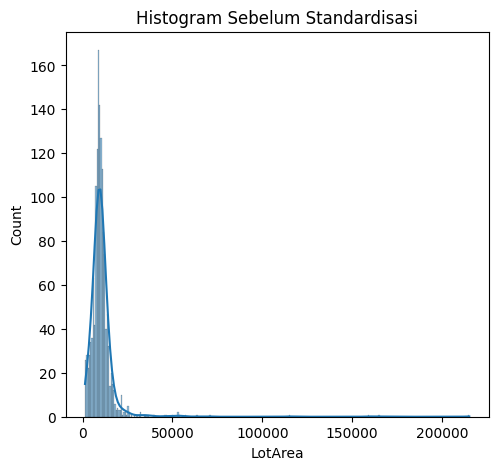

In [ ]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

plt.show()

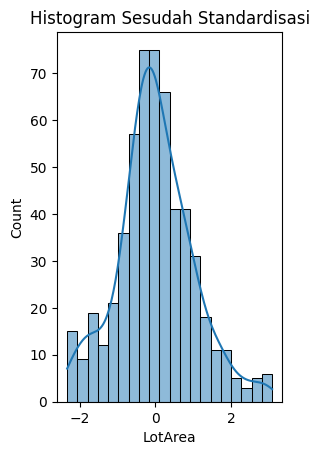

In [ ]:
# Histogram Sesudah Standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Sesudah Standardisasi")

plt.show()

# Menangani Duplikasi Data

In [ ]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 77 columns]


In [ ]:
# Menghapus baris duplikat
df = df.drop_duplicates()

print("DataFrame setelah menghapus duplikat:")
print(df)


DataFrame setelah menghapus duplikat:
            Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0    -1.768952    0.356986    -0.265012 -0.284244     0.614520    -0.523677   
2    -1.764179    0.356986    -0.037099  0.744924     0.614520    -0.523677   
4    -1.759405    0.356986     1.178437  1.851281     1.419903    -0.523677   
6    -1.754632   -0.917637     0.494698  0.316349     1.419903    -0.523677   
10   -1.745085   -0.917637     0.114843  0.726546    -0.996245    -0.523677   
...        ...         ...          ...       ...          ...          ...   
1448  1.687057    0.038330     0.114843  0.934953    -1.801628     2.308244   
1451  1.694217   -0.917637     0.722611  0.014215     1.419903    -0.523677   
1453  1.698991   -0.917637     1.634263  2.938156    -0.996245    -0.523677   
1454  1.701378   -0.917637    -0.492925 -0.633426     0.614520    -0.523677   
1455  1.703764    0.356986    -0.492925 -0.480154    -0.190863    -0.523677   

      YearBui

# Mengoversi Tipe Data

In [ ]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,TA,Min2,Gd,Detchd,Unf,Fa,TA,Y,WD,Normal
1451,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Abnorml
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
# One Hot Encoding
df_one_hot = pd.get_dummies(df, columns=category_features)
df_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,False,False,False,False,True,False,False,False,True,False
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,False,False,False,False,True,False,False,False,True,False
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,False,False,False,False,True,False,False,False,True,False
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,False,False,False,False,True,False,False,False,True,False
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,False,False,False,False,True,False,False,False,True,False
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,False,False,True,False,False,False,False,False,False,True
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,False,False,False,False,True,True,False,False,False,False
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

# inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])

df_lencoder

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,3,3,2,3,2,0,3,2,8,3
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,0,4,2,0,0,2,3,2,6,4
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,3,4,2,0,2,2,3,2,8,0
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,2,4,2,0,1,2,3,2,8,3


# Exploratory dan Explanatory Data Analysis

In [ ]:
df_lencoder.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3


In [ ]:
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_value = df_lencoder.isnull().sum()
missing_percentage = (missing_value / len(df_lencoder)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_value,
    'Persentase': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0] # Menampilkan kolom dengan missing values

,Missing Values,Persentase


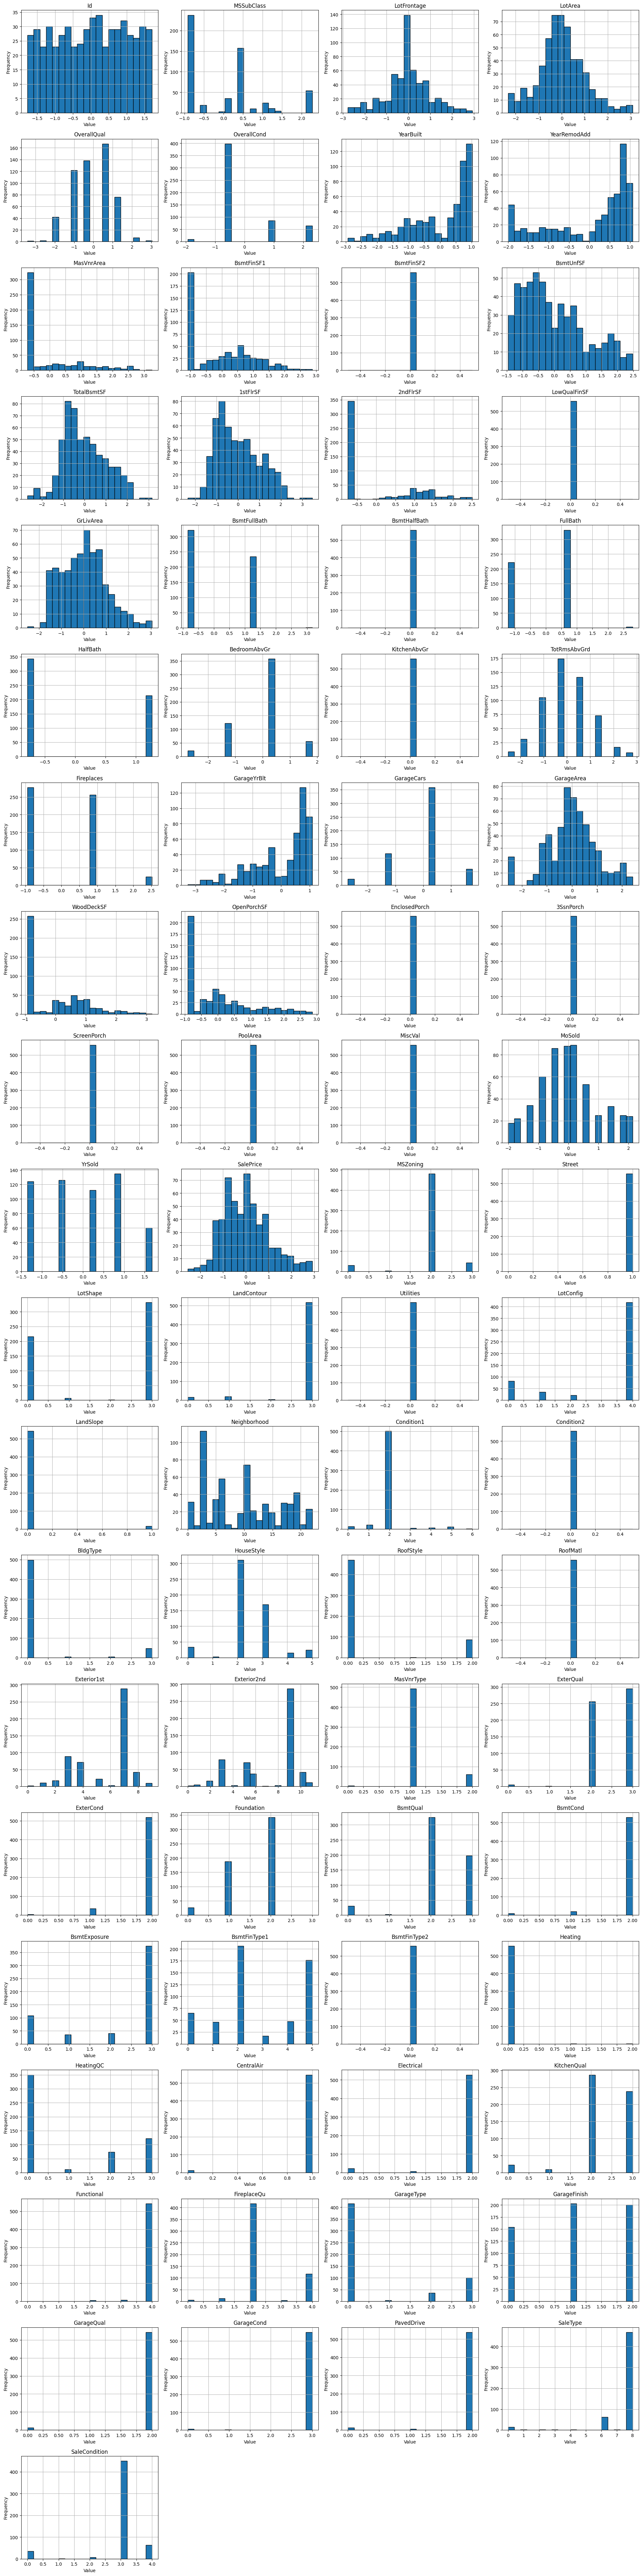

In [ ]:
# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4 # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols) # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
  df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
  axes[i].set_title(column)
  axes[i].set_xlabel('Value')
  axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

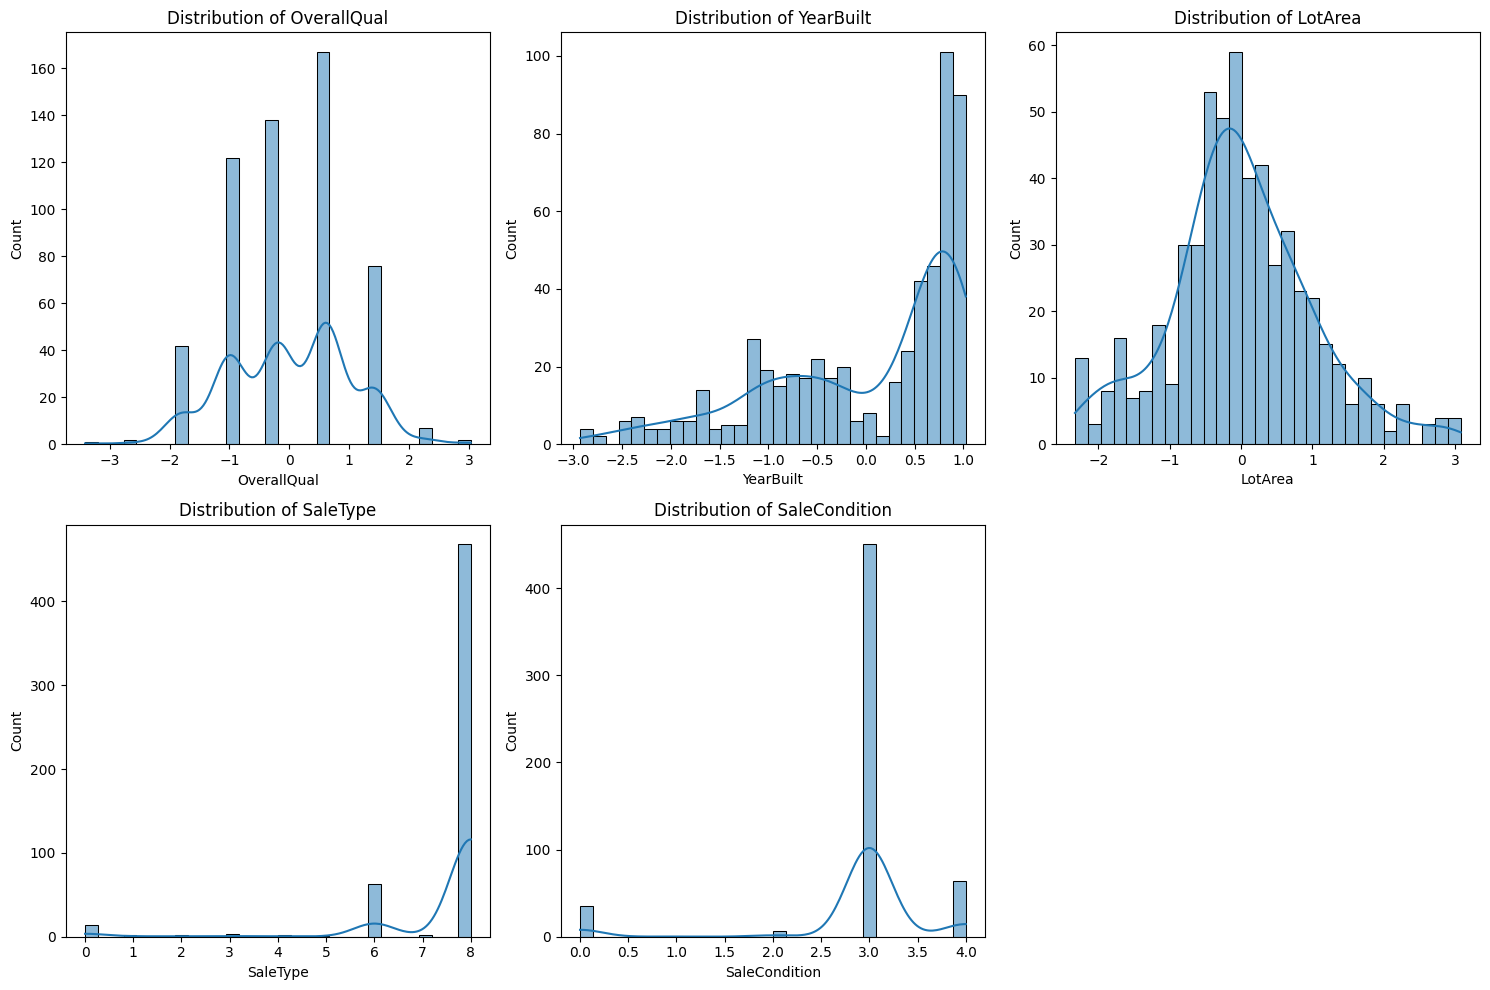

In [ ]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

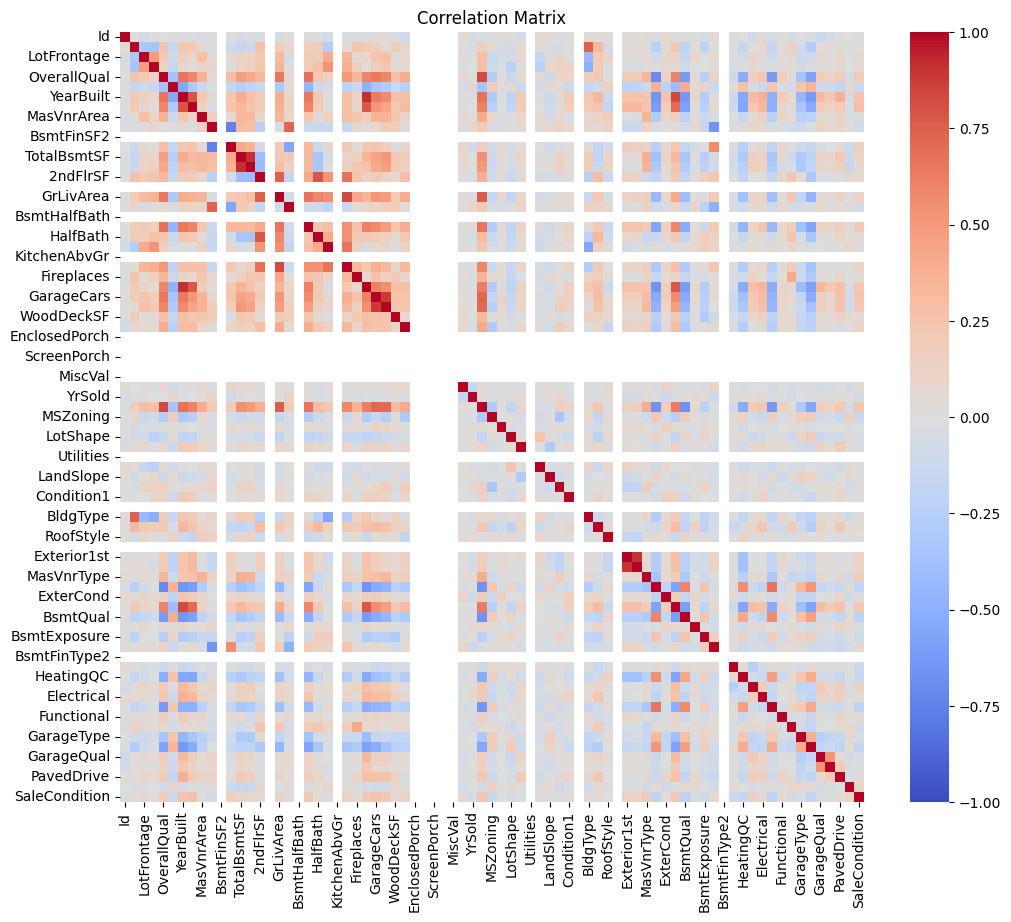

In [ ]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

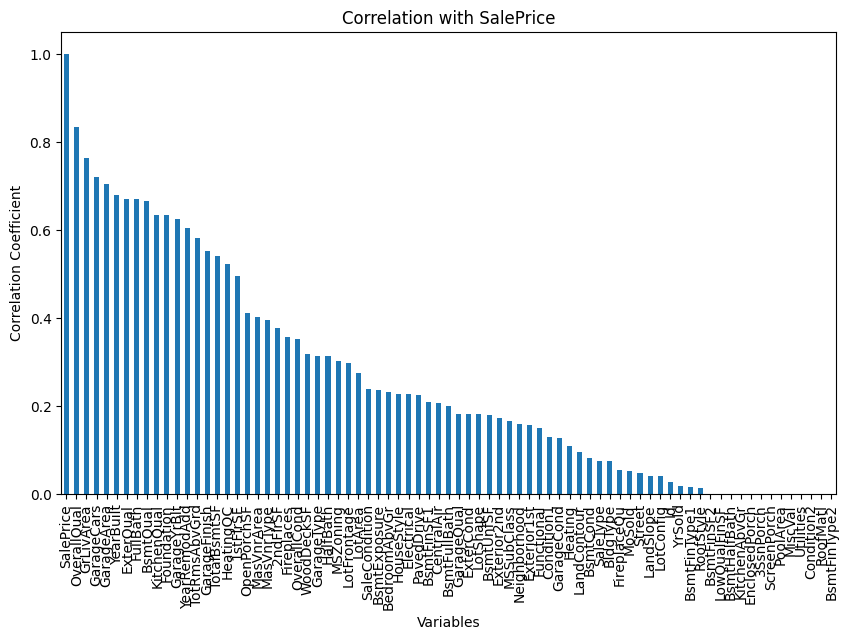

In [ ]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lencoder.corr()['SalePrice']

# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

## Data Splitting

In [ ]:
import sklearn

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split

# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_train
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  557
Jumlah data latih:  445
Jumlah data test:  112


# Modelling

In [ ]:
# Melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

# Melatih model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=184)

## Least Angle Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi pada model LARS
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517


## Linear Regression

In [ ]:
# Evaluasi pada model Linear Regression
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517
Linear Regression,0.237356,0.095778,0.880690


## Gradient Boosting Regressor

In [ ]:
# Evaluasi pada model Gradient Boosting Regressor
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

# Menambahkan hasil evaluasi GBR ke DataFrame
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517
Linear Regression,0.237356,0.095778,0.880690
GradientBoostingRegressor,0.217360,0.089055,0.889065


# **Menyimpan Model**

## Joblib

In [ ]:
import joblib

# Menyimpan model ke dalam file
joblib.dump(GBR, 'gbr_model.joblib')

['gbr_model.joblib']

## Pickle

In [ ]:
import pickle

# Menyimpan model ke dalam file
with open('gbr_model.pkl', 'wb') as file:
    pickle.dump(GBR, file)

# Deployment dan Monitoring

In [ ]:
!pip install streamlit pyngrok --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.8 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("35OzMXpP3bSf4GtQRPktzBjMztV_3DRoz58G9qh7TyXP6ExbV")

In [ ]:
!ls

drive  gbr_model.joblib  gbr_model.pkl	sample_data


In [ ]:
import sklearn, joblib
print("scikit-learn:", sklearn.__version__)
print("joblib:", joblib.__version__)

scikit-learn: 1.6.1
joblib: 1.5.2


In [ ]:
import joblib

# Load model
model = joblib.load('gbr_model.joblib')

In [ ]:
# Memuat model dari file pickle
with open('gbr_model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load('gbr_model.joblib')

# Judul aplikasi
st.title("🏠 Prediksi Harga Rumah")
st.write("Masukkan detail rumah untuk memprediksi harganya")

# Input dari pengguna
luas = st.number_input("Luas rumah (m²):", min_value=20, max_value=1000, value=100)
kamar = st.number_input("Jumlah kamar tidur:", min_value=1, max_value=10, value=3)

# Tombol prediksi
if st.button("Prediksi Harga"):
    prediksi = model.predict(np.array([[luas, kamar]]))
    st.success(f"Perkiraan harga rumah: **{prediksi[0]:,.0f} juta rupiah**")

Writing app.py


In [ ]:
# Jalankan streamlit di background
!streamlit run app.py &>/content/logs.txt &

# Buka port default Streamlit (8501)
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print("Akses Streamlit di URL berikut:")
print(public_url)

Akses Streamlit di URL berikut:
NgrokTunnel: "https://morphogenic-noninfectiously-sheba.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
!pip install streamlit pyngrok --quiet

In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("35OzMXpP3bSf4GtQRPktzBjMztV_3DRoz58G9qh7TyXP6ExbV")

In [ ]:
%%writefile app.py
import streamlit as st

st.title("Streamlit di Google Colab 🚀")
st.write("Halo, ini contoh aplikasi Streamlit yang dijalankan lewat Google Colab!")

name = st.text_input("Masukkan nama kamu:")
if st.button("Kirim"):
    st.success(f"Halo {name}, selamat datang di Colab + Streamlit!")

Overwriting app.py


In [ ]:
# Jalankan streamlit di background
!streamlit run app.py &>/content/logs.txt &

# Buka port default Streamlit (8501)
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print("Akses Streamlit di URL berikut:")
print(public_url)

Akses Streamlit di URL berikut:
NgrokTunnel: "https://morphogenic-noninfectiously-sheba.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
# # Memuat model dari file joblib
# joblib_model = joblib.load('gbr_model.joblib')

# # Memuat model dari file pickle
# with open('gbr_model.pkl', 'rb') as file:
#     pickle_model = pickle.load(file)

In [ ]:
from flask import Flask, request, jsonify
import joblib

In [ ]:
# from flask import Flask, request, jsonify
# import joblib

# # Inisialisasi aplikasi Flask
# app = Flask(__name__)

# # Memuat model yang telah disimpan
# joblib_model = joblib.load('gbr_model.joblib') # Pastikan path file sesuai dengan penyimpanan Anda

# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.json['data']  # Mengambil data dari request JSON
#     prediction = joblib_model.predict(data)  # Melakukan prediksi (harus dalam bentuk 2D array)
#     return jsonify({'prediction': prediction.tolist()})

# if __name__ == '__main__':
#     app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


In [ ]:
{
    "data": [[ 2.58814198e-02, -9.17637181e-01,  7.98581973e-01,
    4.65818252e-03, -1.90862680e-01, -5.23676539e-01,
    5.44502437e-01,  3.98055532e-01, -7.01765886e-01,
    1.84842886e+00,  0.00000000e+00, -7.99528238e-01,
    1.40061034e+00,  1.30453595e+00, -7.43485947e-01,
    0.00000000e+00,  1.75076143e-01,  1.15778146e+00,
    0.00000000e+00,  7.87362373e-01, -7.89877652e-01,
    2.94736730e-01,  0.00000000e+00, -2.35844028e-01,
   -9.44263321e-01,  4.99353260e-01,  2.73711363e-01,
    5.33168369e-01,  7.90365547e-01, -3.15583095e-01,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  2.51894504e-01,
   -1.35256152e+00,  2.00000000e+00,  1.00000000e+00,
    0.00000000e+00,  3.00000000e+00,  0.00000000e+00,
    4.00000000e+00,  0.00000000e+00,  3.00000000e+00,
    2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    7.00000000e+00,  9.00000000e+00,  1.00000000e+00,
    3.00000000e+00,  1.00000000e+00,  2.00000000e+00,
    2.00000000e+00,  2.00000000e+00,  1.00000000e+00,
    2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  1.00000000e+00,  2.00000000e+00,
    2.00000000e+00,  4.00000000e+00,  2.00000000e+00,
    0.00000000e+00,  1.00000000e+00,  2.00000000e+00,
    3.00000000e+00,  2.00000000e+00,  8.00000000e+00,
    3.00000000e+00]]
  }

{'data': [[0.0258814198,
   -0.917637181,
   0.798581973,
   0.00465818252,
   -0.19086268,
   -0.523676539,
   0.544502437,
   0.398055532,
   -0.701765886,
   1.84842886,
   0.0,
   -0.799528238,
   1.40061034,
   1.30453595,
   -0.743485947,
   0.0,
   0.175076143,
   1.15778146,
   0.0,
   0.787362373,
   -0.789877652,
   0.29473673,
   0.0,
   -0.235844028,
   -0.944263321,
   0.49935326,
   0.273711363,
   0.533168369,
   0.790365547,
   -0.315583095,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.251894504,
   -1.35256152,
   2.0,
   1.0,
   0.0,
   3.0,
   0.0,
   4.0,
   0.0,
   3.0,
   2.0,
   0.0,
   0.0,
   2.0,
   0.0,
   0.0,
   7.0,
   9.0,
   1.0,
   3.0,
   1.0,
   2.0,
   2.0,
   2.0,
   1.0,
   2.0,
   0.0,
   0.0,
   0.0,
   1.0,
   2.0,
   2.0,
   4.0,
   2.0,
   0.0,
   1.0,
   2.0,
   3.0,
   2.0,
   8.0,
   3.0]]}